<a href="https://colab.research.google.com/github/marciopugnal/mvp-analise-dados/blob/main/MVP_JogosTabuleiro_MarcioPugnal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MVP Análise de Dados e Boas Práticas

**Nome:** MÁRCIO DE LIMA LOSS PUGNAL

**Código Aluno:** 4052025000363

**Curso:** Pós CIÊNCIA DE DADOS E ANALYTICS

**Dataset:** [Board-Games] [fonte: https://www.kaggle.com/datasets/andrewmvd/board-games ]  

**✨ Sobre:**  
O conjunto de dados foi coletado em fevereiro de 2021 e reúne informações sobre jogos de tabuleiro do site BoardGameGeek (BGG).  
O BGG é a maior coleção online de dados sobre jogos de tabuleiro, abrangendo mais de 100.000 títulos, entre classificados e não classificados. A comunidade voluntária contribui ativamente para o site, fornecendo análises, classificações, imagens, vídeos, relatórios de sessões e participando de fóruns de discussão.  
Este conjunto de dados inclui todos os *jogos classificados* (~20.000) na data da coleta. *Jogos não classificados* foram desconsiderados, pois, para que um título seja elegível para classificação, ele precisa ter recebido pelo menos 30 votos dos usuários do BGG.

###🧩 1. Descrição ou definição do problema

O conjunto de dados a ser analisado contém informações sobre jogos de tabuleiro. Trata-se de um dataset multivariado e com dados estruturados, composto por registros de jogos de tabuleiro que incluem diversas características, como por exemplo, avaliações, complexidade, tempo de jogo, mecânicas e domínios.  
A partir dessas informações, busca-se analisar os fatores que influenciam a "preferência" e o "engajamento" de um jogo, relação ao tempo de jogo, complexidade e nível de recomendação pelos usuários, além de outras possíveis correlações entre as características associadas.  
O desafio é extrair insights significativos desse conjunto de dados para identificar tendências, fatores de popularidade, padrões de comportamento e relações entre o jogo e o jogador junto à comunidade.

#### 1.1. Hipóteses do Problema

As hipóteses formuladas são as seguintes:
- a) A idade mínima recomendada afeta a avaliação dos usuários?
- b) Jogos que suportam um maior número de jogadores tendem a ser mais populares ou a possuir um maior número de proprietários?
- c) Jogos com menor tempo médio de partida tendem a ser mais bem avaliados?
- d) O Subgenero do jogo influencia na sua nota média?
- e) O tempo médio de jogo está relacionado à classificação no BoardGameGeek?
- f) A complexidade do jogo afeta sua popularidade?

#### 1.2. Tipo de Problema

Este é um problema de classificação *não supervisionada*, uma vez que o objetivo é explorar relações e padrões sem a presença de uma variável-alvo previamente definida. A proposta consiste em identificar estruturas ocultas nos dados, como a formação de grupos de jogos com características semelhantes. Isso permite, por exemplo, traçar perfis de popularidade dos jogos e descobrir fatores comuns entre casos que não possuem rótulos específicos, revelando insights relevantes de forma autônoma e exploratória.

#### 1.3. Seleção de Dados

O dataset "Board-Games" está disponível na Kaggle (vide fonte acima), porém necessita de etapas de seleção de dados, pois ainda não foi curado. Ele não passou por um processo de organização, limpeza e validação para garantir sua qualidade e usabilidade.

#### 1.4. Atributos do Dataset

O dataset "Board-Games" ou "Jogos de Tabuleiros" disponível contém 20.343 instâncias (amostras), distribuídas em 14 atributos (variáveis) relacionados a seguir:

**ID:** Identificação BoardGamesGeek  
**Name:** Nome do jogo de tabuleiro  
**Year Published:** Ano de publicação  
**Min Players:** Número Mínimo de Jogadores  
**Max Players:** Número Máximo de Jogadores  
**Play Time:** Tempo médio de jogo (minutos)   
**Min Age:** Idade Mínima (Classificação etária)   
**Users Rated:** Usuários avaliados (Quantidade de usuários que analisaram o jogo)  
**Rating Average:** Média de Classificação  
**BGG Rank:** Classificação BGG (BoardGameGeek)  
**Complexity Average:** Média de Complexidade (Classificação de complexidade)  
**Owned Users:** Usuários Proprietários  (Quantidade de usuários que possuem o jogo)  
**Mechanics:** Mecânica do jogo  
**Domains:** Domínios ou Subgênero de jogo

###📥 2. Importação das bibliotecas, coleta e carga de dados.

Esta seção reúne todas as bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, além de realizar o carregamento inicial do dataset "Board-Games".   
Como os dados já estavam previamente disponíveis no site do Kaggle, sob o nome "Board-Games", a etapa de coleta foi substituída pelo carregamento local.

In [ ]:
# Importação de pacotes.

# Manipulação de dados: tabulares e numéricos.
import pandas as pd     # Criação e manipulação de DataFrames e Series (dados tabulares).
import numpy as np      # Operações matemáticas e manipulação de arrays multidimensionais.
import math             # Funções matemáticas fundamentais.

# Visualização de dados:
import matplotlib.pyplot as plt         # Criação de gráficos básicos.
import matplotlib.ticker as mticker     # Personalizar "ticks" (as marcações dos eixos).
import seaborn as sns                   # Gráficos estatísticos avançados com estilização.

# Transformações de dados:
from sklearn.model_selection import train_test_split    # Divide o conjunto de dados em treino e teste.
from sklearn.decomposition import PCA                   # Redução da dimensionalidade para eliminar variáveis redundantes..
from sklearn.compose import ColumnTransformer           # Permite aplicar transformações diferentes a colunas específicas.
from sklearn.pipeline import Pipeline                   # Estrutura para aplicar múltiplas transformações em sequência.
from sklearn.linear_model import LogisticRegression     # Modelo estatístico para classificação binária e multiclasse.

# Pré-processamento numérico:
from sklearn.preprocessing import MinMaxScaler          # Normaliza valores dentro de um intervalo específico (exemplo: 0 a 1).
from sklearn.preprocessing import StandardScaler        # Padroniza dados para média 0 e desvio padrão 1.

# Pré-processamento categórico:
from sklearn.preprocessing import OneHotEncoder         # Codifica variáveis categóricas em colunas binárias (one-hot).
from sklearn.preprocessing import OrdinalEncoder        # Codifica variáveis categóricas em inteiros, preservando ou assumindo ordem.
from sklearn.preprocessing import LabelEncoder          # Codifica rótulos (target) em inteiros, geralmente usado para variáveis de saída.

# Ignorar warnings (avisos).
import warnings
warnings.filterwarnings("ignore")  # Oculta mensagens de aviso durante a execução.

In [ ]:
# Definindo o dataset (base de dados).
# O arquivo do dataset "Board-Games" é "bgg_dataset.csv".
# Repositório do Github. URL com os dados para importar:
url_dados = "https://raw.githubusercontent.com/marciopugnal/mvp-analise-dados/refs/heads/main/bgg_dataset.csv"

In [ ]:
# Definindo o dataframe para receber a carga do dataset.
# Lê o arquivo já com os cabeçalhos das colunas.
# Os atributos são separados por ";", pois as vírgulas estão presentes nos campos de texto livre.
tabuleiro = pd.read_csv(url_dados, delimiter=';')

In [ ]:
# Exibindo as dimensões original do dataset.
# No caso, será 20.343 linhas (instâncias) x 14 colunas (atributos).
print("Dimensões do dataset:")
print(tabuleiro.shape)

Dimensões do dataset:
(20343, 14)


In [ ]:
# Exibindo os cabeçalhos originais.
print("Cabeçalhos do dataset:")
tabuleiro.columns

Cabeçalhos do dataset:


Index(['ID', 'Name', 'Year Published', 'Min Players', 'Max Players',
       'Play Time', 'Min Age', 'Users Rated', 'Rating Average', 'BGG Rank',
       'Complexity Average', 'Owned Users', 'Mechanics', 'Domains'],
      dtype='object')

In [ ]:
# Mostra as 5 primeiras linhas do dataset, para ter idéia iniciais das informações.
tabuleiro.head()

ID                               Name  Year Published  Min Players  \
0  174430.0                         Gloomhaven          2017.0            1   
1  161936.0          Pandemic Legacy: Season 1          2015.0            2   
2  224517.0                  Brass: Birmingham          2018.0            2   
3  167791.0                  Terraforming Mars          2016.0            1   
4  233078.0  Twilight Imperium: Fourth Edition          2017.0            3   

   Max Players  Play Time  Min Age  Users Rated Rating Average  BGG Rank  \
0            4        120       14        42055           8,79         1   
1            4         60       13        41643           8,61         2   
2            4        120       14        19217           8,66         3   
3            5        120       12        64864           8,43         4   
4            6        480       14        13468            8,7         5   

  Complexity Average  Owned Users  \
0               3,86      68323.0   
1               2,84      65294.0   
2               3,91      28785.0   
3               3,24      87099.0   
4               4,22      16831.0   

                                           Mechanics  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                          Domains  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

In [ ]:
# Renomeando os cabeçalhos das colunas para melhorar a legibilidade.
tabuleiro.rename(columns={"ID":"ID",
                          "Name": "Nome Jogo",
                          "Year Published": "Ano Publicacao",
                          "Min Players": "Min Jogadores",
                          "Max Players": "Max Jogadores",
                          "Play Time" : "Tempo Jogo",
                          "Min Age": "Idade Minima",
                          "Users Rated": "Usuario Avaliado",
                          "Rating Average": "Media Classificacao",
                          "BGG Rank": "Classificacao BGG",
                          "Complexity Average": "Media Complexidade",
                          "Owned Users": "Usuario Proprietario",
                          "Mechanics": "Mecanica Jogo",
                          "Domains": "Subgenero Jogo"
                          }, inplace=True)

In [ ]:
# Exibindo os cabeçalhos alterados.
tabuleiro.columns

Index(['ID', 'Nome Jogo', 'Ano Publicacao', 'Min Jogadores', 'Max Jogadores',
       'Tempo Jogo', 'Idade Minima', 'Usuario Avaliado', 'Media Classificacao',
       'Classificacao BGG', 'Media Complexidade', 'Usuario Proprietario',
       'Mecanica Jogo', 'Subgenero Jogo'],
      dtype='object')

In [ ]:
# Exibe todas as colunas sem truncar
pd.set_option('display.max_columns', None)

In [ ]:
# Mostra as 5 últimas linhas do dataset já com os cabeçalhos renomeados.
tabuleiro.tail()

ID           Nome Jogo  Ano Publicacao  Min Jogadores  \
20338  16398.0                 War             0.0              2   
20339   7316.0               Bingo          1530.0              2   
20340   5048.0          Candy Land          1949.0              2   
20341   5432.0  Chutes and Ladders          -200.0              2   
20342  11901.0         Tic-Tac-Toe         -1300.0              2   

       Max Jogadores  Tempo Jogo  Idade Minima  Usuario Avaliado  \
20338              2          30             4              1340   
20339             99          60             5              2154   
20340              4          30             3              4006   
20341              6          30             3              3783   
20342              2           1             4              3275   

      Media Classificacao  Classificacao BGG Media Complexidade  \
20338                2,28              20340                  1   
20339                2,85              20341               1,05   
20340                3,18              20342               1,08   
20341                2,86              20343               1,02   
20342                2,68              20344               1,16   

       Usuario Proprietario  \
20338                 427.0   
20339                1533.0   
20340                5788.0   
20341                4400.0   
20342                1374.0   

                                           Mecanica Jogo  \
20338                                                NaN   
20339   Betting and Bluffing, Bingo, Pattern Recognition   
20340                               Roll / Spin and Move   
20341  Dice Rolling, Grid Movement, Race, Roll / Spin...   
20342                 Paper-and-Pencil, Pattern Building   

                         Subgenero Jogo  
20338                  Children's Games  
20339                       Party Games  
20340                  Children's Games  
20341                  Children's Games  
20342  Abstract Games, Children's Games

###🧹3. Limpeza e preparação dos dados (pré-processamento).

A etapa de preparação e limpeza de dados é essencial na ciência de dados, pois garante que as informações empregadas nos modelos sejam precisas, consistentes e relevantes. Durante esse processo, os dados brutos passam por diversas transformações que eliminam erros, corrigem inconsistências e aprimoram sua qualidade, resultando em análises mais robustas e fundamentando decisões mais seguras nas etapas seguintes.

#### 3.1. Tipo das Instâncias.

O dataset de "Board-Games" analisado possui, inicialmente, 20.343 instâncias (registros de jogadores de tabuleiro), contendo valores númericos e categóricos ou textuais.  
A maioria das características iniciais de medição é do tipo númerico (float64 e int64), havendo 5 características do tipo categóricos (object).  
Em suma: dtypes: float64(3), int64(6), object(5).

In [ ]:
# Exibindo 5 linhas aleatórias.
tabuleiro.sample(5)

ID                                Nome Jogo  Ano Publicacao  \
7714   270637.0                                Axio Rota          2019.0   
11041  208337.0                             Forestaurant          2016.0   
19998  198961.0                     Yeti in My Spaghetti          2015.0   
9833   310726.0  Iron Curtain: Central Europe, 1945-1989          2020.0   
9106      865.0                                Landslide          1971.0   

       Min Jogadores  Max Jogadores  Tempo Jogo  Idade Minima  \
7714               1              4          30             8   
11041              1              5          45             9   
19998              2             99          15             4   
9833               1              2           0             0   
9106               2              4          90             9   

       Usuario Avaliado Media Classificacao  Classificacao BGG  \
7714                 98                6,95               7716   
11041                45                7,77              11043   
19998               246                4,91              20000   
9833                 40                7,87               9835   
9106                221                6,17               9108   

      Media Complexidade  Usuario Proprietario  \
7714                1,67                 220.0   
11041                2,5                  77.0   
19998                  1                 616.0   
9833                 2,6                 296.0   
9106                1,43                 421.0   

                                     Mecanica Jogo  Subgenero Jogo  
7714                              Pattern Building  Abstract Games  
11041  Action Points, Cooperative Game, Simulation             NaN  
19998                           Player Elimination             NaN  
9833                    Dice Rolling, Hexagon Grid        Wargames  
9106         Auction/Bidding, Roll / Spin and Move             NaN

In [ ]:
# Exibir o total de instâncias do dataset.
print(f"Total de instâncias: {len(tabuleiro)}")

# Exibir todos os atributos e seus respectivos tipos de dados.
print("\nTipos de dados por coluna:")
print(tabuleiro.info())

Total de instâncias: 20343

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20327 non-null  float64
 1   Nome Jogo             20343 non-null  object 
 2   Ano Publicacao        20342 non-null  float64
 3   Min Jogadores         20343 non-null  int64  
 4   Max Jogadores         20343 non-null  int64  
 5   Tempo Jogo            20343 non-null  int64  
 6   Idade Minima          20343 non-null  int64  
 7   Usuario Avaliado      20343 non-null  int64  
 8   Media Classificacao   20343 non-null  object 
 9   Classificacao BGG     20343 non-null  int64  
 10  Media Complexidade    20343 non-null  object 
 11  Usuario Proprietario  20320 non-null  float64
 12  Mecanica Jogo         18745 non-null  object 
 13  Subgenero Jogo        10184 non-null  object 
dtypes: float64(3), 

In [ ]:
# Exibindo a quantidade de linhas (com valores) por coluna.
# Observa-se a presença de atributos com dados faltantes, ou seja, a quantidade de valores não corresponde ao número total de instâncias, que é 20.343.
print(tabuleiro.count())

ID                      20327
Nome Jogo               20343
Ano Publicacao          20342
Min Jogadores           20343
Max Jogadores           20343
Tempo Jogo              20343
Idade Minima            20343
Usuario Avaliado        20343
Media Classificacao     20343
Classificacao BGG       20343
Media Complexidade      20343
Usuario Proprietario    20320
Mecanica Jogo           18745
Subgenero Jogo          10184
dtype: int64


In [ ]:
# Selecionando um subconjunto de linhas consecutivas para analisar o tipo de informação.
# Observa-se a necessidade de tratar alguns dados, por exemplo, "ID", "Ano Publicacao", "Media Classificacao", "Media Complexidade" e"Usuario Proprietario".
tabuleiro[21:26]

ID                      Nome Jogo  Ano Publicacao  Min Jogadores  \
21  205637.0   Arkham Horror: The Card Game          2016.0              1   
22  183394.0  Viticulture Essential Edition          2015.0              1   
23  167355.0                        Nemesis          2018.0              1   
24  164928.0                        Orléans          2014.0              2   
25   96848.0         Mage Knight Board Game          2011.0              1   

    Max Jogadores  Tempo Jogo  Idade Minima  Usuario Avaliado  \
21              2         120            14             28577   
22              6          90            13             29486   
23              5         180            12             12290   
24              4          90            12             22244   
25              4         240            14             27850   

   Media Classificacao  Classificacao BGG Media Complexidade  \
21                8,17                 22               3,44   
22                8,08                 23               2,91   
23                 8,4                 24               3,35   
24                8,09                 25               3,05   
25                 8,1                 26               4,31   

    Usuario Proprietario                                      Mecanica Jogo  \
21               50883.0  Action Points, Cooperative Game, Deck Construc...   
22               39747.0  Contracts, Hand Management, Solo / Solitaire G...   
23               17574.0  Campaign / Battle Card Driven, Cooperative Gam...   
24               27093.0  Deck Bag and Pool Building, Point to Point Mov...   
25               39421.0  Card Drafting, Cooperative Game, Deck Bag and ...   

                        Subgenero Jogo  
21  Customizable Games, Thematic Games  
22                      Strategy Games  
23                      Thematic Games  
24                      Strategy Games  
25      Strategy Games, Thematic Games

In [ ]:
# Seleção de features (características)
# Selecionando "ID", "Ano Publicacao", "Media Classificacao", "Media Complexidade" e "Usuario Proprietario".
tabuleiro.loc[:,["ID", "Ano Publicacao", "Media Classificacao", "Media Complexidade","Usuario Proprietario"]]

ID  Ano Publicacao Media Classificacao Media Complexidade  \
0      174430.0          2017.0                8,79               3,86   
1      161936.0          2015.0                8,61               2,84   
2      224517.0          2018.0                8,66               3,91   
3      167791.0          2016.0                8,43               3,24   
4      233078.0          2017.0                 8,7               4,22   
...         ...             ...                 ...                ...   
20338   16398.0             0.0                2,28                  1   
20339    7316.0          1530.0                2,85               1,05   
20340    5048.0          1949.0                3,18               1,08   
20341    5432.0          -200.0                2,86               1,02   
20342   11901.0         -1300.0                2,68               1,16   

       Usuario Proprietario  
0                   68323.0  
1                   65294.0  
2                   28785.0  
3                   87099.0  
4                   16831.0  
...                     ...  
20338                 427.0  
20339                1533.0  
20340                5788.0  
20341                4400.0  
20342                1374.0  

[20343 rows x 5 columns]

#### 3.2. Limpeza dos dados  
Limpeza de Dados (Data Wrangling) é o processo de refinar os dados brutos — que comumente apresentam 'sujeira' — por meio da identificação e correção de erros, inconsistências e imprecisões. Seu objetivo é garantir qualidade, confiabilidade e relevância do conjunto de dados, tornando-o apto para análises mais profunda e modelagem preditiva precisa.

In [ ]:
# Convertendo "ID", "Ano Publicação" e "Usuário Proprietário" para valores inteiros.
# Motivo: Não faz sentido em tê-los como número real.
tabuleiro["ID"] = tabuleiro["ID"].fillna(0).astype("int64")
tabuleiro["Ano Publicacao"] = tabuleiro["Ano Publicacao"].fillna(0).astype("int64")
tabuleiro["Usuario Proprietario"] = tabuleiro["Usuario Proprietario"].fillna(0).astype("int64")

In [ ]:
# Substituir vírgulas por ponto, pois o separador decimal é o "." (ponto)
tabuleiro["Media Classificacao"] = tabuleiro["Media Classificacao"].str.replace(",", ".")
tabuleiro["Media Complexidade"] = tabuleiro["Media Complexidade"].str.replace(",", ".")

# Convertendo de string(object) para número real (Float64).
tabuleiro["Media Classificacao"] = tabuleiro["Media Classificacao"].fillna(0).astype("Float64")
tabuleiro["Media Complexidade"] = tabuleiro["Media Complexidade"].fillna(0).astype("Float64")

In [ ]:
# Localizando ANOS "duvidosos" (negativos ou igual a zero)
print(tabuleiro.loc[tabuleiro["Ano Publicacao"] <=0, "Ano Publicacao"])

172     -2200
1043        0
1275    -3000
1488        0
2839        0
         ... 
20299       0
20332       0
20338       0
20341    -200
20342   -1300
Name: Ano Publicacao, Length: 196, dtype: int64


In [ ]:
# Realizando cópia do dataset, para tratamento de inconsistências sem prejudicar o original.
tabuleiro_aux = tabuleiro.copy()

# Valores potencialmente inválidos.
# Excluindo ANOS ("Ano Publicacao") negativo ou igual a zero.
# Motivo: Não foi encontrada nenhuma justificativa para que o ano seja menor ou igual a zero.
tabuleiro_aux = tabuleiro_aux.drop(tabuleiro_aux[tabuleiro_aux["Ano Publicacao"] <=0].index)

#### 3.3. Tratamento de missing (valores ausentes)

In [ ]:
# Verificando a existência de valores nulls (ausência de um dado ou informação) no dataset.
print(tabuleiro_aux.isnull().sum())

ID                          0
Nome Jogo                   0
Ano Publicacao              0
Min Jogadores               0
Max Jogadores               0
Tempo Jogo                  0
Idade Minima                0
Usuario Avaliado            0
Media Classificacao         0
Classificacao BGG           0
Media Complexidade          0
Usuario Proprietario        0
Mecanica Jogo            1563
Subgenero Jogo          10027
dtype: int64


In [ ]:
# Eliminando linhas que tenham ALGUM valor missing (por algum motivo não foi registrado ou está indisponível).
# Valores missing (ausentes) são representados como NaN (Not a Number) ou None.
# O dataset já foi copiado.
tabuleiro_aux.dropna(how='any', inplace=True) # Excluindo os valores missing. O dataset "tabuleiro" foi copiado para preservar os valores.

In [ ]:
# Verificando a existência de valores nulls no dataset.
print(tabuleiro_aux.isnull().sum())

ID                      0
Nome Jogo               0
Ano Publicacao          0
Min Jogadores           0
Max Jogadores           0
Tempo Jogo              0
Idade Minima            0
Usuario Avaliado        0
Media Classificacao     0
Classificacao BGG       0
Media Complexidade      0
Usuario Proprietario    0
Mecanica Jogo           0
Subgenero Jogo          0
dtype: int64


In [ ]:
# Verificando a existência de valores únicos, ou seja, quantidade de valores que não se repete.
print(tabuleiro_aux.nunique())

ID                      9654
Nome Jogo               9540
Ano Publicacao           153
Min Jogadores             10
Max Jogadores             36
Tempo Jogo                99
Idade Minima              19
Usuario Avaliado        2930
Media Classificacao      518
Classificacao BGG       9654
Media Complexidade       377
Usuario Proprietario    3814
Mecanica Jogo           4576
Subgenero Jogo            39
dtype: int64


In [ ]:
# Verificando o RANGE (intervalo) dos valores.
valores_minimos = tabuleiro_aux.min(numeric_only=True) # Valores mínimos:
valores_maximos = tabuleiro_aux.max(numeric_only=True) # Valores máximos:

# Criando dataframe com os resultados.
range_valores = pd.DataFrame({'Mínimos por coluna': valores_minimos, 'Máximos por coluna': valores_maximos})

# Exibindo a tabela formatada.
print(range_valores)

                      Mínimos por coluna  Máximos por coluna
ID                                   1.0            322289.0
Ano Publicacao                     400.0              2021.0
Min Jogadores                        0.0                10.0
Max Jogadores                        0.0               163.0
Tempo Jogo                           0.0             60000.0
Idade Minima                         0.0                21.0
Usuario Avaliado                    30.0            102214.0
Media Classificacao                 1.43                9.34
Classificacao BGG                    1.0             20342.0
Media Complexidade                   0.0                 5.0
Usuario Proprietario                 3.0            155312.0


#### 3.4. Limpeza de dados - continuação

In [ ]:
# Verificando os valores únicos do "Ano Publicação" para identificar inconsistências.
print(tabuleiro_aux["Ano Publicacao"].unique())

[2017 2015 2018 2016 2020 2005 2012 2011 2013 2007 2019 2014 2002 2004
 2008 2006 2010 1876 1995 2009 1997 1982 1999 1993 1991 2000 2003 1986
 1998 1992 1996 1964 1979 1980 1985 1994 1475 2001 1990 1983 1989 1959
 1630 1977 1800 1925 1984 1850 1988 1810 1987 1971 1978 1587 1981  762
 1973 1974 1962 2021 1848 1903 1938 1947 1948 1960 1895 1930 1972 1976
 1906 1967 1745 1864 1970 1946  400 1883 1965 1975 1966 1425 1701 1969
 1939 1600 1942 1909 1904 1932 1963  700 1780 1663 1956 1951 1715  550
 1885 1955 1887 1889 1680 1953 1958 1954 1968 1700 1949 1881 1943 1911
 1824 1000 1913 1961 1742 1300 1945 1775 1919  650 1936 1937  500 1952
 1803 1940 1884 1935 1957 1500 1125 1890 1400 1851 1927 1861 1550 1783
 1750 1920 1916 1866 1893 1687 1150 1796 1931 1929 1874 1933 1530]


In [ ]:
# Filtrando os anos menores que 1000.
anos_menores_que_1000 = tabuleiro_aux[tabuleiro_aux["Ano Publicacao"] <= 1000]

# Exibindo só a coluna "Ano Publicacao".
print(anos_menores_que_1000["Ano Publicacao"])

1395      762
2736      400
3729      700
5294      550
6286      700
10248    1000
14366     650
15296    1000
15461     500
20324     400
Name: Ano Publicacao, dtype: int64


In [ ]:
# Removendo as linhas com "ANO" menor que 1000.
# Motivo: Limitaremos nossa análise aos jogos lançados nos últimos 1.000 anos (entre 1025 e 2025).
tabuleiro_aux = tabuleiro_aux[tabuleiro_aux["Ano Publicacao"] > 1000]

# Exibe o DataFrame resultante
print(tabuleiro_aux["Ano Publicacao"])

0        2017
1        2015
2        2018
3        2016
4        2017
         ... 
20335    1933
20336    1960
20337    1965
20339    1530
20340    1949
Name: Ano Publicacao, Length: 9644, dtype: int64


In [ ]:
# Cria-se uma cópia do dataset, com ele já curado ("tratado").
# Curado = "Dados Limpos".
tabuleiro_curado = tabuleiro_aux.copy()

###🔍 4. Análise Exploratória de Dados (AED/EDA)
Nesta etapa de Análise Exploratória de Dados (AED) do dataset "Board-Games", nosso objetivo principal é tentar compreender a distribuição, as relações e as características das variáveis. Isso envolve visualizar padrões através de gráficos, identificar tendências e formular hipóteses, fornecendo insights para as etapas subsequentes de pré-processamento e modelagem.

####4.1. Visualizações de dados
Criar gráficos para identificar padrões, outliers, distribuições e relações entre variáveis.

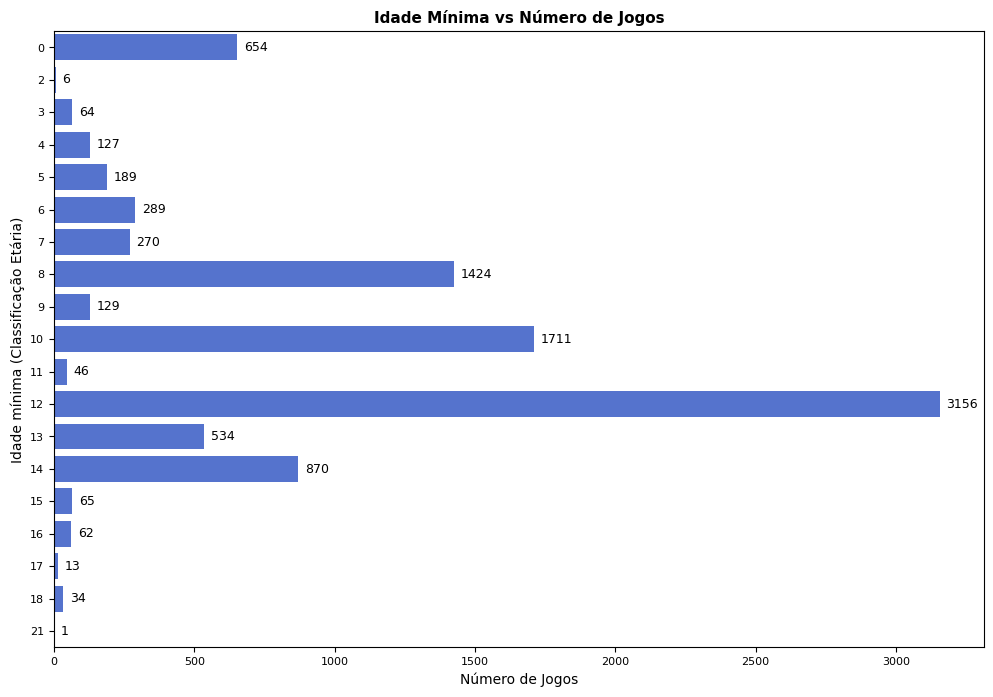

In [ ]:
# Gráfico de barras simples - Seaborn.

# Gráfico do número de Jogos de tabuleiros.
plt.figure(figsize=(12, 8))

# Cria um gráfico de barras horizontais
ax = sns.countplot(y='Idade Minima', data=tabuleiro_curado, color='royalblue')

# Reduzindo o tamanho da fonte dos rótulos no eixo Y.
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)

# Reduzindo o tamanho da fonte dos rótulos no eixo X.
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

# Adiciona os valores nos rótulos.
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=9, padding=5)

# Personalização do gráfico.
plt.title('Idade Mínima vs Número de Jogos', fontsize=11, fontweight='bold')
plt.xlabel('Número de Jogos', fontsize=10)
plt.ylabel('Idade mínima (Classificação Etária)', fontsize=10)

# Exibe o gráfico.
plt.show()

📌**Cometário:** *O gráfico de barras mostra que a maior parte dos jogos de tabuleiro analisados apresenta em uma faixa etária entre 8 e 14 anos. Essa distribuição dos dados indica uma desequilíbrio na distribuição das classes, caracterizando um conjunto de dados desbalanceado.*  

⚠️**Observação:** *A idade "0", embora inicialmente pareça atípica no contexto de jogos de tabuleiro, pode assumir diferentes interpretações. Ela pode representar jogos destinados a bebês (0 a 11 meses); indicar classificação livre, ou seja, sem restrições etárias; ou até mesmo ausência de informação, representando um valor nulo ou não informado. Por esses motivos, a categoria foi mantida no conjunto de dados, assegurando uma abordagem mais abrangente na análise, respeitando a diversidade de significados atribuídos a esse valor.*

#### 4.2. Estatísticas Descritivas

As estatísticas descritivas fornecem um resumo das características de variáveis numéricas, incluindo medidas como média, desvio padrão, valores mínimo e máximo, além dos quartis.

In [ ]:
# Realiza um resumo estatístico dos atributos numéricos do dataset, considerando que:
# Count = Contagem;
# Mean = Média;
# Std = Desvio padrão;
# min = mínimo;
# max = máximo;
# 25% = 25% quartil;
# 50% = 50% quartil;
# 75% = 75% quartil;
tabuleiro_curado.describe()

ID  Ano Publicacao  Min Jogadores  Max Jogadores  \
count    9644.000000     9644.000000    9644.000000    9644.000000   
mean    76561.162173     2001.669432       1.946184       4.678868   
std     85385.328849       29.282962       0.633755       7.069282   
min         1.000000     1125.000000       0.000000       0.000000   
25%      6920.750000     1996.000000       2.000000       2.000000   
50%     31815.000000     2007.000000       2.000000       4.000000   
75%    144500.250000     2014.000000       2.000000       5.000000   
max    322289.000000     2021.000000      10.000000     163.000000   

         Tempo Jogo  Idade Minima  Usuario Avaliado  Media Classificacao  \
count   9644.000000   9644.000000       9644.000000               9644.0   
mean     138.302157      9.878163       1614.687889             6.630832   
std      779.878353      3.659519       4978.545515             0.851221   
min        0.000000      0.000000         30.000000                 1.43   
25%       30.000000      8.000000         86.000000                 6.11   
50%       60.000000     10.000000        300.000000                 6.66   
75%      120.000000     12.000000       1096.000000                 7.21   
max    60000.000000     21.000000     102214.000000                 9.34   

       Classificacao BGG  Media Complexidade  Usuario Proprietario  
count        9644.000000              9644.0           9644.000000  
mean         7575.805890            2.330879           2588.986831  
std          5830.934559            0.843976           7110.756184  
min             1.000000                 0.0              3.000000  
25%          2525.750000                1.67            259.000000  
50%          6171.500000                 2.3            678.000000  
75%         11894.500000                2.91           2053.000000  
max         20342.000000                 5.0         155312.000000

##### 4.2.1. Média

É uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. Seu cálculo é feito pela soma de todos os valores dividida pelo número total de observações. Trata-se de uma medida sensível a valores extremos (outliers), que podem distorcer significativamente seu resultado.

In [ ]:
# Obtém a média dos atributos numéricos do dataset.
print(tabuleiro_curado.describe().loc['mean'])

ID                      76561.162173
Ano Publicacao           2001.669432
Min Jogadores               1.946184
Max Jogadores               4.678868
Tempo Jogo                138.302157
Idade Minima                9.878163
Usuario Avaliado         1614.687889
Media Classificacao         6.630832
Classificacao BGG         7575.80589
Media Complexidade          2.330879
Usuario Proprietario     2588.986831
Name: mean, dtype: Float64


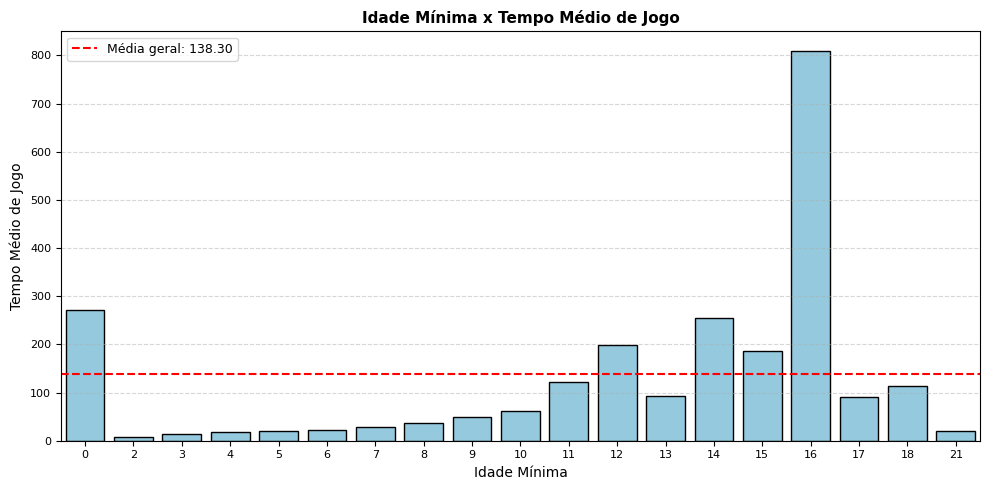

In [ ]:
# Gráfico para mostrar a média.

# Agrupar os dados pela Idade Mínima e calcular a média do Tempo de Jogo
media_por_idade = tabuleiro_curado.groupby('Idade Minima')['Tempo Jogo'].mean().reset_index()

# Calcular a média geral do Tempo de Jogo
media_geral = tabuleiro_curado['Tempo Jogo'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x='Idade Minima', y='Tempo Jogo', data=media_por_idade, color='skyblue', edgecolor='black')

# Adicionar linha da média geral
plt.axhline(media_geral, color='red', linestyle='--', label=f'Média geral: {media_geral:.2f}')

# Personalização do gráfico
plt.title('Idade Mínima x Tempo Médio de Jogo', fontsize=11, fontweight='bold')
plt.xlabel('Idade Mínima', fontsize=10)
plt.ylabel('Tempo Médio de Jogo', fontsize=10)
plt.legend(loc='upper left', fontsize=9)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

plt.grid(axis='y', linestyle='dashed', alpha=0.5)
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário:** *Observa-se que jogadores de 16 anos apresentam um tempo médio de jogo consideravelmente superior em comparação com as demais faixas etárias. Entretanto, a análise evidencia um aumento progressivo do tempo de jogo com o avanço da idade, uma vez que a faixa etária de 11 a 18 anos mantém um tempo médio entre 100 e 200 minutos, demonstrando certa estabilidade nesse intervalo. Por outro lado, aos 21 anos, nota-se uma redução no tempo médio de jogo.*


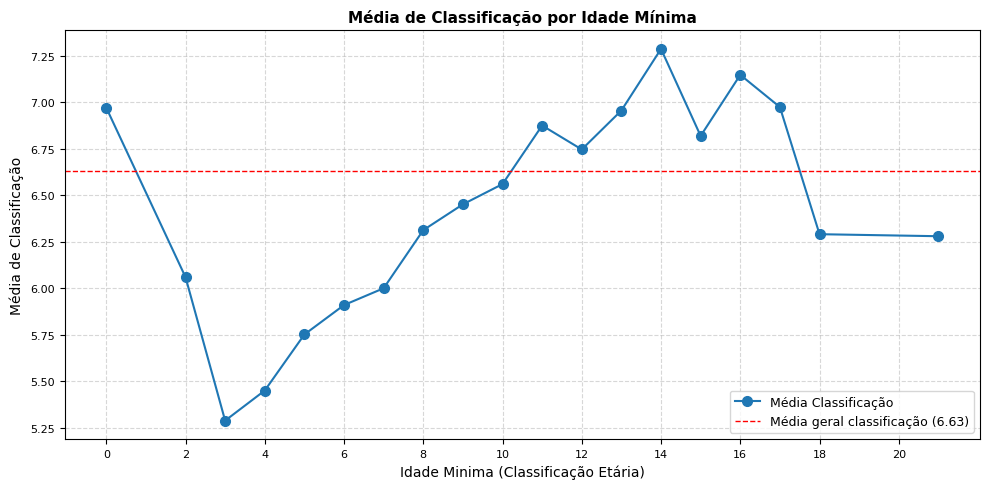

In [ ]:
# Gráfico para mostrar a média.

# Calculando a média da variável desejada
media_valores = tabuleiro_curado['Media Classificacao'].mean()
media_valoresIM = tabuleiro_curado['Idade Minima'].mean()

# Criando o gráfico de linha
plt.figure(figsize=(10,5))
tabuleiro_curado.groupby("Idade Minima")["Media Classificacao"].mean().plot(kind="line", marker="o", linestyle="-", markersize=7, label="Média Classificação")

plt.xticks(np.arange(min(tabuleiro_curado['Idade Minima']), max(tabuleiro_curado['Idade Minima'])+1, step=2))

# Adicionando uma linha horizontal representando a média geral
plt.axhline(media_valores, color="r", linestyle="dashed", linewidth=1, label=f"Média geral classificação ({media_valores:.2f})")

# Personalização do gráfico.
plt.title("Média de Classificação por Idade Mínima",fontsize=11, fontweight='bold')
plt.xlabel("Idade Minima (Classificação Etária)",fontsize=10)
plt.ylabel("Média de Classificação",fontsize=10)
plt.grid(True, linestyle="dashed", alpha=0.5)
plt.legend(loc='lower right', fontsize=9)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True)
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário:** *Nota-se que, à medida que a "Idade Mínima (classificação etária)" dos jogos aumenta, a média de classificação também cresce. No entanto, a partir dos 16 anos, observa-se uma tendência de queda nessa média. Esse comportamento pode estar relacionado a fatores como maior exigência dos jogadores mais velhos, critérios de avaliação mais rigorosos ou até mesmo uma mudança no perfil dos jogos voltados para essa faixa etária.*

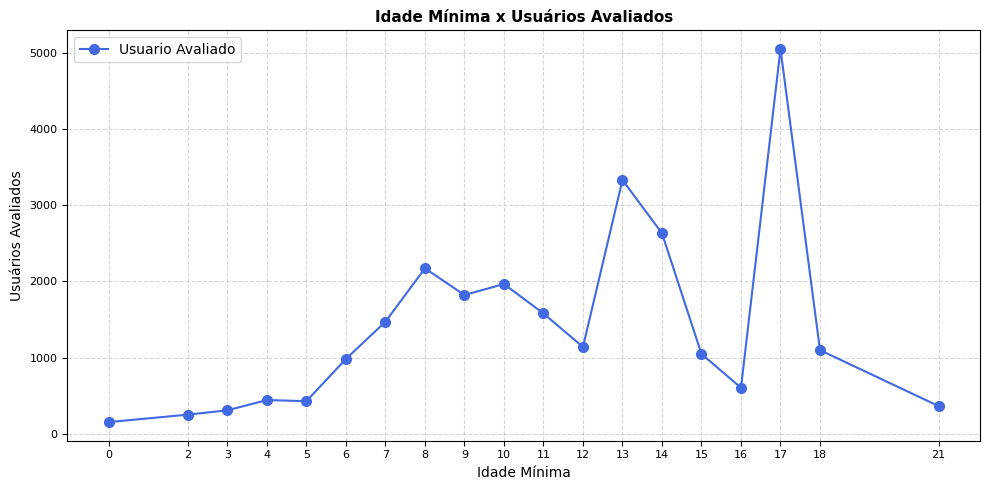

In [ ]:
# Gráfico de linhas

# Configuração do tamanho da figura
plt.figure(figsize=(10, 5))

# Calcula a média de "Tempo Jogo" para cada "Idade Minima"
media_usuario_avaliado = tabuleiro_curado.groupby("Idade Minima")["Usuario Avaliado"].mean()

# Plota um gráfico de linhas com melhor visualização
plt.plot(media_usuario_avaliado.index, media_usuario_avaliado.values,
         linestyle='-', marker='o', markersize=7,
         color='royalblue', label="Usuario Avaliado")

# Personalização do gráfico
plt.title("Idade Mínima x Usuários Avaliados", fontsize=11, fontweight='bold')
plt.xlabel("Idade Mínima", fontsize=10)
plt.ylabel("Usuários Avaliados", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)
plt.xticks(media_usuario_avaliado.index)  # Ajusta os valores do eixo X
plt.legend(loc="upper left", fontsize=10)  # Melhor posicionamento da legenda

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário:** *Observa-se que a partir dos 5 anos há um aumento na quantidade de usuários avaliados, seguido por uma queda a partir da idade mínima de 18 anos. Jogadores de 17 anos apresentam um número significativamente maior de usuários avaliados em comparação às demais faixas etárias. Por outro lado, os usuários de 16 anos mostram uma redução na quantidade em relação ao grupo de 13 a 15 anos, sugerindo uma possível variação no interesse ou na participação conforme a idade avança.*


In [ ]:
# Exibindo a média de cada atributo, agrupado por "Idade Minima".
colunas_selecionadas = ["Min Jogadores", "Max Jogadores", "Tempo Jogo", "Idade Minima", "Usuario Avaliado", "Media Classificacao", "Media Complexidade", "Usuario Proprietario"]
tabuleiro_curado.groupby('Idade Minima')[colunas_selecionadas].mean(numeric_only=True)

Min Jogadores  Max Jogadores  Tempo Jogo  Idade Minima  \
Idade Minima                                                           
0                  1.759939       3.223242  272.316514           0.0   
2                  1.000000       3.666667    8.333333           2.0   
3                  1.765625       4.531250   14.843750           3.0   
4                  1.929134       5.346457   17.181102           4.0   
5                  1.962963       6.798942   20.555556           5.0   
6                  1.986159       5.529412   22.519031           6.0   
7                  2.007407       5.288889   28.837037           7.0   
8                  2.058989       5.570927   37.154494           8.0   
9                  2.077519       4.232558   50.116279           9.0   
10                 2.056108       5.075395   62.101695          10.0   
11                 1.760870       6.043478  121.630435          11.0   
12                 1.903359       4.008555  197.931559          12.0   
13                 1.874532       4.674157   92.676030          13.0   
14                 1.828736       4.860920  254.718391          14.0   
15                 2.061538       4.723077  186.000000          15.0   
16                 1.967742       4.274194  809.354839          16.0   
17                 2.384615       8.461538   90.384615          17.0   
18                 2.323529       6.117647  113.970588          18.0   
21                 3.000000       6.000000   20.000000          21.0   

              Usuario Avaliado  Media Classificacao  Media Complexidade  \
Idade Minima                                                              
0                   152.481651             6.971223            2.712125   
2                   250.000000                 6.06                 1.0   
3                   306.750000             5.288125            1.124375   
4                   441.811024             5.450079            1.089921   
5                   426.798942             5.751481            1.148148   
6                   981.453287             5.909723            1.311522   
7                  1470.366667             6.000111            1.447185   
8                  2171.349719              6.31269            1.653013   
9                  1821.100775             6.451473            1.954109   
10                 1965.534191             6.560421             2.12512   
11                 1578.782609             6.875435             2.48087   
12                 1138.396388             6.746543            2.805051   
13                 3331.764045             6.956161            2.502135   
14                 2632.703448             7.287379             2.86369   
15                 1047.230769             6.819385            2.652769   
16                  603.177419             7.147903            3.134677   
17                 5052.230769             6.974615            2.346154   
18                 1097.117647             6.290882            1.954118   
21                  363.000000                 6.28                1.94   

              Usuario Proprietario  
Idade Minima                        
0                       424.912844  
2                       618.166667  
3                       538.906250  
4                       761.204724  
5                       778.730159  
6                      1677.702422  
7                      2510.248148  
8                      3416.660112  
9                      2712.496124  
10                     3052.437171  
11                     2726.413043  
12                     1816.026299  
13                     5091.232210  
14                     4399.060920  
15                     2001.430769  
16                     1289.290323  
17                     8315.384615  
18                     2520.088235  
21                     1158.000000

##### 4.2.2. Desvio Padrão

O desvio padrão é uma medida de dispersão que expressa o grau de variação dos valores em relação à média de um conjunto de dados. Um desvio padrão baixo indica que os dados estão concentrados próximos à média, enquanto um desvio padrão elevado revela uma maior dispersão dos valores. Essa medida é calculada como a raiz quadrada da variância.

In [ ]:
# Desvio padrão dos atributos numéricos do dataset.
print(tabuleiro_curado.describe().loc['std'])

ID                      85385.328849
Ano Publicacao             29.282962
Min Jogadores               0.633755
Max Jogadores               7.069282
Tempo Jogo                779.878353
Idade Minima                3.659519
Usuario Avaliado         4978.545515
Media Classificacao         0.851221
Classificacao BGG        5830.934559
Media Complexidade          0.843976
Usuario Proprietario     7110.756184
Name: std, dtype: Float64


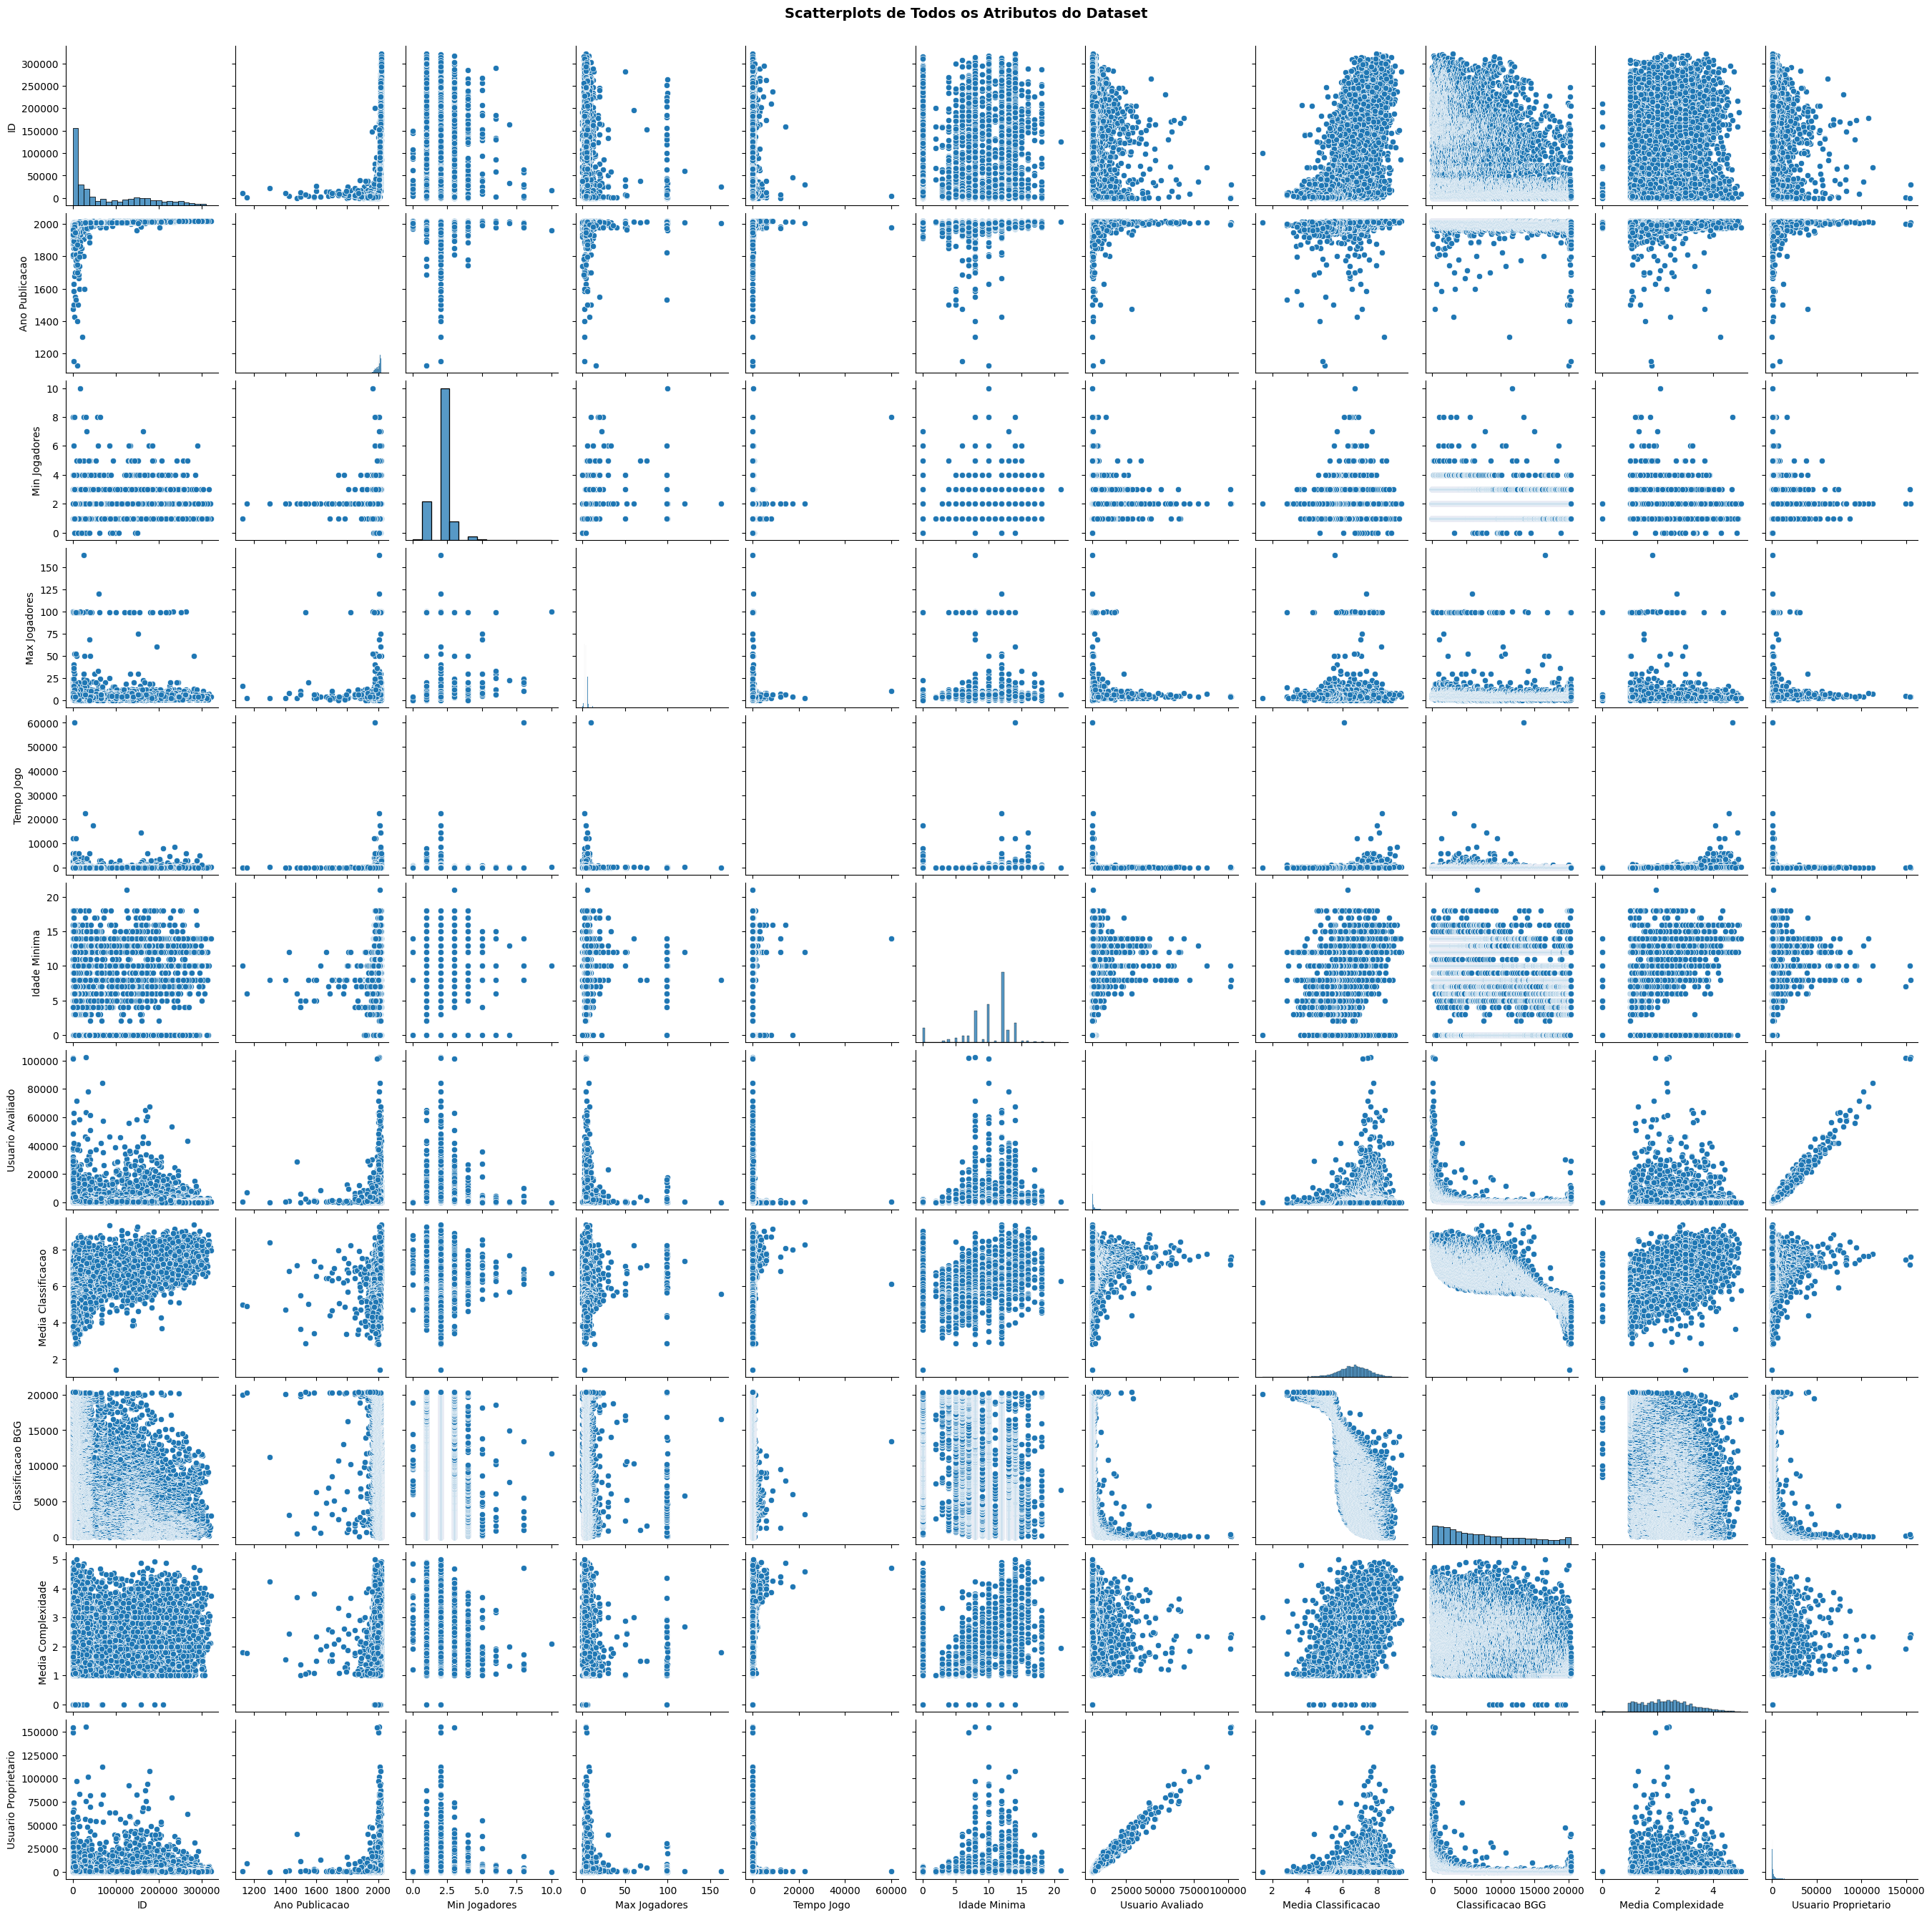

In [ ]:
# Gráfico Pairplot (ou gráfico de pares)

# Criando um Pairplot para visualizar todos os scatterplots
sns.pairplot(tabuleiro_curado)

# Ajustando título global
plt.suptitle('Scatterplots de Todos os Atributos do Dataset', fontsize=14, fontweight='bold')

# Ajuste para evitar sobreposição entre o título e os gráficos
plt.subplots_adjust(top=0.96)

# Exibir os gráficos
plt.show()

📌**Cometário:** *O PairPlot permite a construção de uma matriz de gráficos de dispersão (scatter plots) entre todas as variáveis numéricas do dataframe tabuleiro_curado, viabilizando uma análise visual das relações entre os dados. Na diagonal da matriz, são exibidos histogramas, o que facilita a identificação de padrões, correlações e distribuições das variáveis. Essa abordagem é fundamental na análise exploratória de dados, proporcionando uma compreensão mais aprofundada da estrutura do conjunto e de eventuais tendências.*

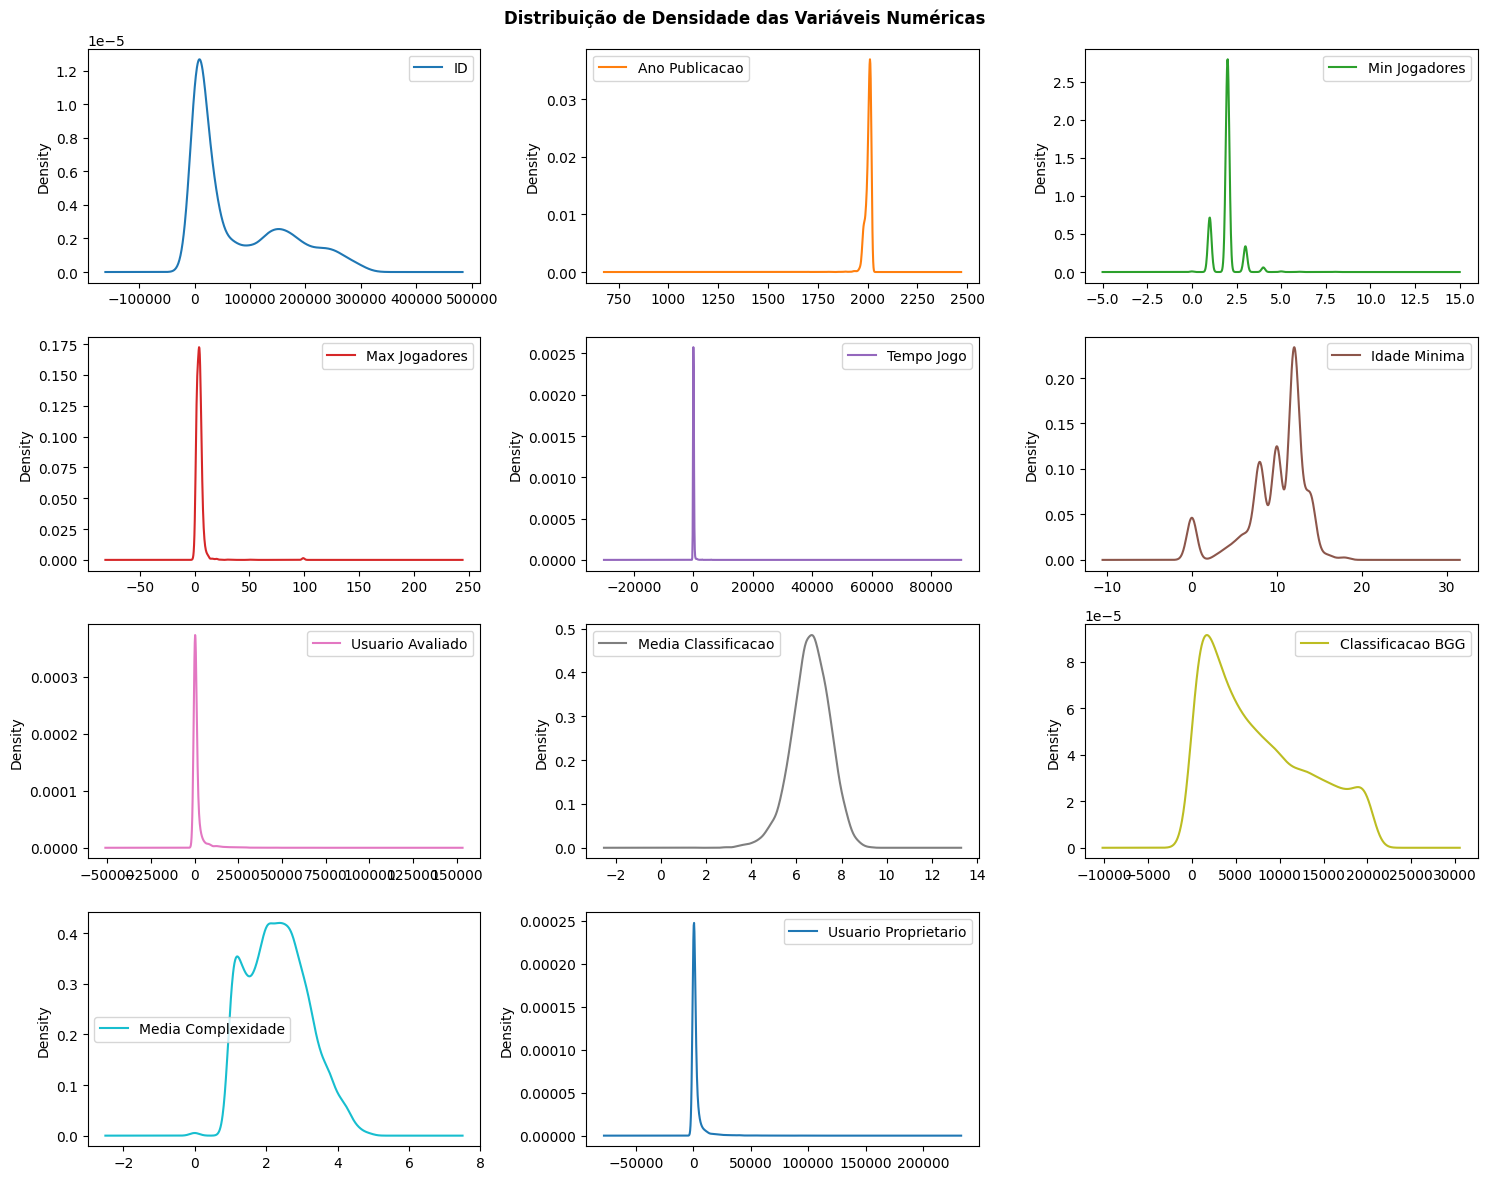

In [ ]:
# Density plot (ou gráfico de densidade)

# Define área de plotagem
tabuleiro_curado.plot(
    kind='density',
    subplots=True,
    layout=(4, 3),  # Agora com 12 posições
    sharex=False,
    figsize=(15, 12)
)

# Ajustando título global
plt.suptitle('Distribuição de Densidade das Variáveis Numéricas', fontsize=12, fontweight='bold')

# Ajuste para evitar sobreposição entre o título e os gráficos
plt.subplots_adjust(top=0.9)

# Ajuste organização do layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

📌**Cometário:** *Os gráficos de densidade gerados pelo Density Plot (também conhecidos como KDE – Kernel Density Estimation) representam a distribuição das variáveis numéricas do dataframe 'tabuleiro_curado' por meio de curvas suavizadas. Essa técnica proporciona uma análise visual mais refinada dos padrões presentes nos dados. Essa abordagem facilita a identificação de tendências, agrupamentos, assimetrias e outras características relevantes nas distribuições, configurando-se como uma ferramenta essencial na etapa de análise exploratória. Os gráficos de densidade mostram a ocorrência de picos, concentrações, variações e dispersões, promovendo uma compreensão mais aprofundada da estrutura estatística do conjunto de dados.*

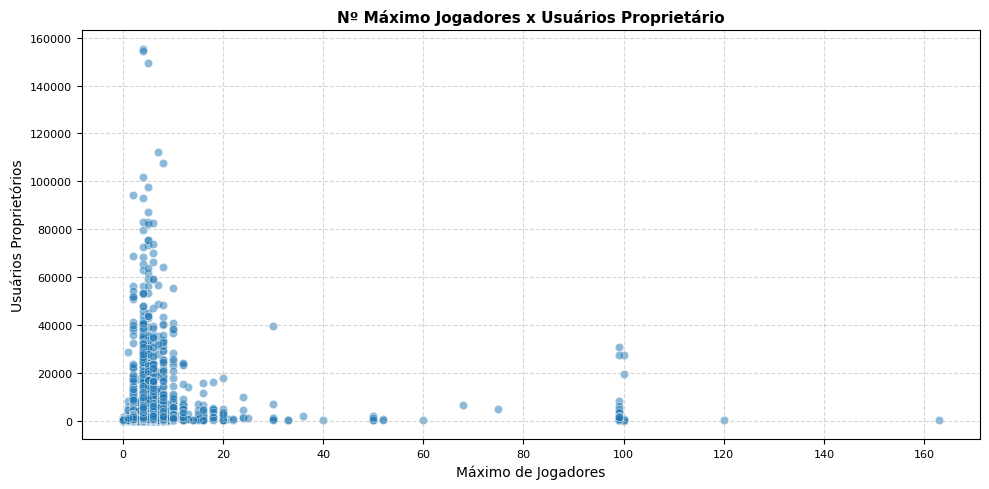

In [ ]:
# Scatterplot, ou gráfico de dispersão

# Define área de plotagem
plt.figure(figsize=(10, 5))

# Criando o gráfico scatterplot
sns.scatterplot(x=tabuleiro_curado["Max Jogadores"], y=tabuleiro["Usuario Proprietario"], alpha=0.5)

# Configurações do gráfico
plt.title("Nº Máximo Jogadores x Usuários Proprietário", fontsize=11, fontweight='bold')
plt.xlabel("Máximo de Jogadores", fontsize=10)
plt.ylabel("Usuários Proprietórios", fontsize=10)

plt.grid(True, linestyle="--", alpha=0.5)
plt.grid(True)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste do layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

📌**Cometário:** *Observa-se uma concentração significativa de usuários proprietários em jogos que permitem até, no máximo, 20 jogadores. O número de proprietários pode atingir aproximadamente 60.000, sendo que, a partir desse ponto, verifica-se uma maior dispersão nos dados. Além disso, identificam-se pontos extremos (outliers), tanto em relação ao aumento do número máximo de jogadores quanto à elevação da quantidade de proprietários, o que sugere uma possível tendência de que jogos com menor capacidade máxima de jogadores despertam maior interesse por parte dos usuários.*

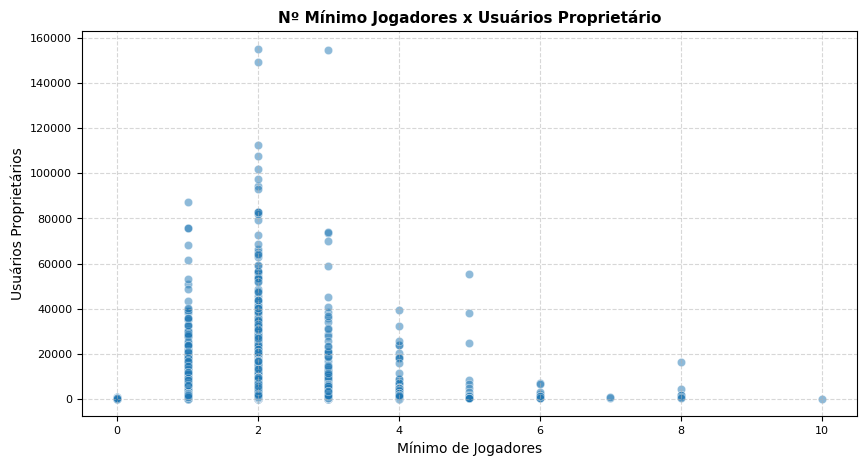

In [ ]:
# Scatterplot, ou gráfico de dispersão

# Criando o gráfico scatterplot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=tabuleiro_curado["Min Jogadores"], y=tabuleiro["Usuario Proprietario"], alpha=0.5)

# Configurações do gráfico
plt.title("Nº Mínimo Jogadores x Usuários Proprietário", fontsize=11, fontweight='bold')
plt.xlabel("Mínimo de Jogadores", fontsize=10)
plt.ylabel("Usuários Proprietários", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True)

# Exibe o gráfico
plt.show()

📌**Cometário:** *Observa-se uma concentração expressiva de usuários proprietários em jogos que suportam entre 1 e 4 jogadores. Nesses casos, o número de proprietários pode alcançar aproximadamente 80.000. A partir desse ponto, nota-se uma dispersão mais acentuada nos dados. Além disso, identificam-se pontos extremos (outliers), tanto em relação ao aumento do número máximo de jogadores quanto ao crescimento na quantidade de usuários proprietários, o que sugere uma possível tendência de maior interesse por jogos voltados a grupos reduzidos.*

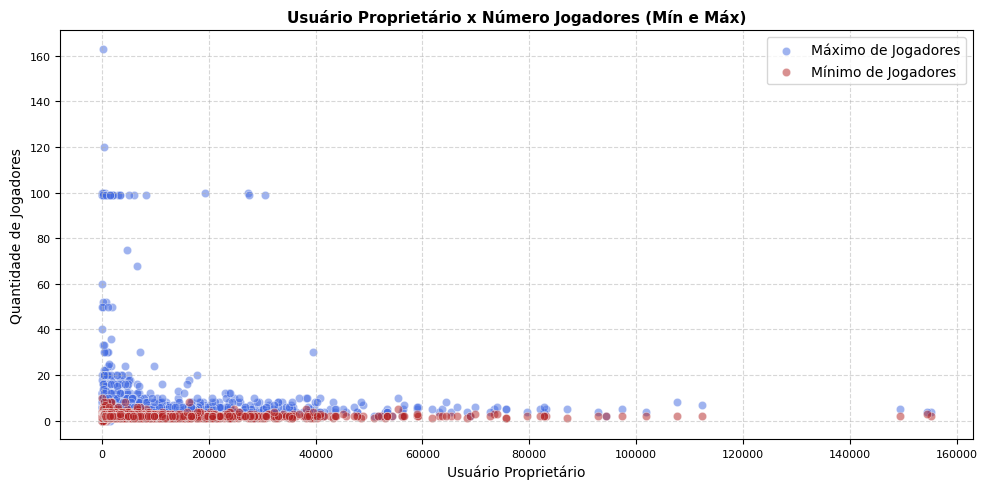

In [ ]:
# Scatterplot, ou gráfico de dispersão

# Define área de plotagem
plt.figure(figsize=(10, 5))

# Max Jogadores (em azul)
sns.scatterplot(
    x=tabuleiro_curado["Usuario Proprietario"],
    y=tabuleiro_curado["Max Jogadores"],
    alpha=0.5,
    label="Máximo de Jogadores",
    color='royalblue'
)

# Min Jogadores (em vermelho)
sns.scatterplot(
    x=tabuleiro_curado["Usuario Proprietario"],
    y=tabuleiro_curado["Min Jogadores"],
    alpha=0.5,
    label="Mínimo de Jogadores",
    color='firebrick'
)

# Configurações do gráfico
plt.title("Usuário Proprietário x Número Jogadores (Mín e Máx)", fontsize=11, fontweight='bold')
plt.xlabel("Usuário Proprietário", fontsize=10)
plt.ylabel("Quantidade de Jogadores", fontsize=10)
plt.legend()

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário:** *Observa-se uma concentração significativa de usuários proprietários em jogos que permitem, no máximo, até 20 jogadores. A quantidade de proprietários pode alcançar cerca de 40.000, e, a partir desse ponto, percebe-se uma maior dispersão nos dados. Além disso, identificam-se pontos extremos (outliers), tanto no aumento do número de jogadores quanto na elevação do número de proprietários, o que sugere uma possível tendência de que, quanto menor o número de jogadores permitido, maior o interesse dos usuários.*

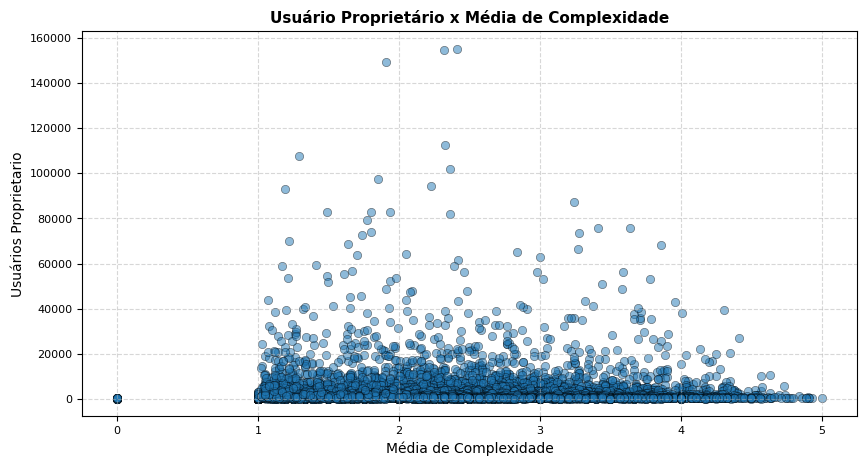

In [ ]:
# Scatterplot, ou gráfico de dispersão

# Define área de plotagem
plt.figure(figsize=(10, 5))

# Criando o gráfico scatterplot
sns.scatterplot(x=tabuleiro_curado['Media Complexidade'], y=tabuleiro_curado['Usuario Proprietario'], alpha=0.5, edgecolor='black')

# Configurações do gráfico
plt.title('Usuário Proprietário x Média de Complexidade', fontsize=11, fontweight='bold')
plt.xlabel('Média de Complexidade', fontsize=10)
plt.ylabel('Usuários Proprietario', fontsize=10)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True, linestyle='dashed', alpha=0.5)

# Exibir o gráfico
plt.show()

📌**Cometário:** *Observa-se uma concentração significativa de usuários proprietários em jogos com média de complexidade entre 1 e 4, totalizando até aproximadamente 20.000 usuários. A partir desse ponto, nota-se uma maior dispersão nos dados, indicando variações no interesse dos jogadores em relação ao nível de complexidade. Além disso, identificam-se pontos extremos (outliers) relacionados à elevação no número de proprietários, sugerindo uma possível tendência de preferência por jogos com complexidade moderada. Por outro lado, jogos com níveis de complexidade muito baixos ou extremamente elevados tendem a despertar menor interesse por parte dos usuários proprietários.*

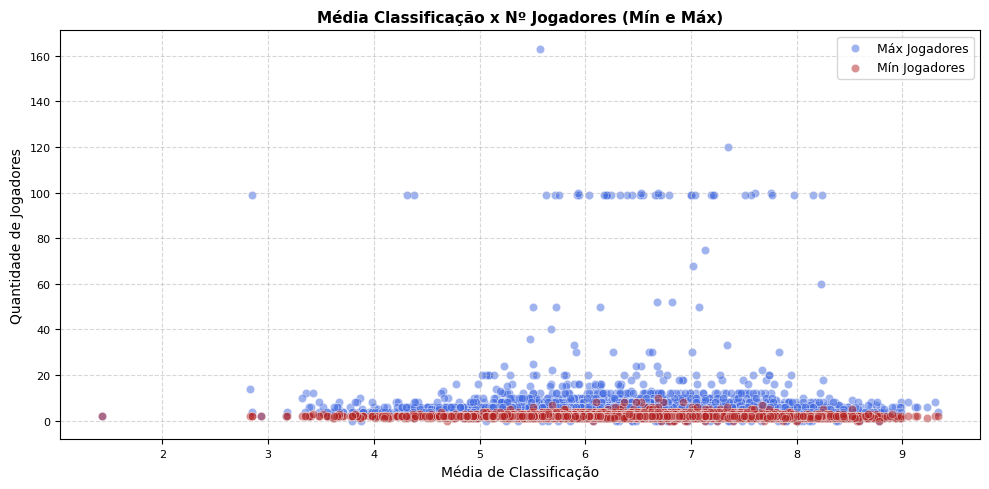

In [ ]:
# Scatterplot, ou gráfico de dispersão

# Define área de plotagem
plt.figure(figsize=(10, 5))

# Máximo de jogadores (azul padrão)
sns.scatterplot(
    x=tabuleiro_curado["Media Classificacao"],
    y=tabuleiro_curado["Max Jogadores"],
    alpha=0.5,
    label="Máx Jogadores",
    color='royalblue'
)

# Mínimo de jogadores (vermelho)
sns.scatterplot(
    x=tabuleiro_curado["Media Classificacao"],
    y=tabuleiro_curado["Min Jogadores"],
    alpha=0.5,
    label="Mín Jogadores",
    color='firebrick'
)

# Configurações do gráfico
plt.title("Média Classificação x Nº Jogadores (Mín e Máx)", fontsize=11, fontweight='bold')
plt.xlabel("Média de Classificação", fontsize=10)
plt.ylabel("Quantidade de Jogadores", fontsize=10)
plt.legend(loc='upper right', fontsize=9)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Exibir o gráfico.
plt.show()

📌**Comentário**: *Observa-se uma concentração de jogadores em jogos com média de classificação entre 4 e 9, especialmente entre aqueles que suportam até 20 participantes. Nos extremos dessa faixa de classificação, nota-se uma dispersão mais acentuada, acompanhada por um aumento no número de jogadores. Esse padrão sugere um possível interesse por jogos destinados a grupos de até 20 participantes, cuja média de avaliação tende a ser mais elevada.*

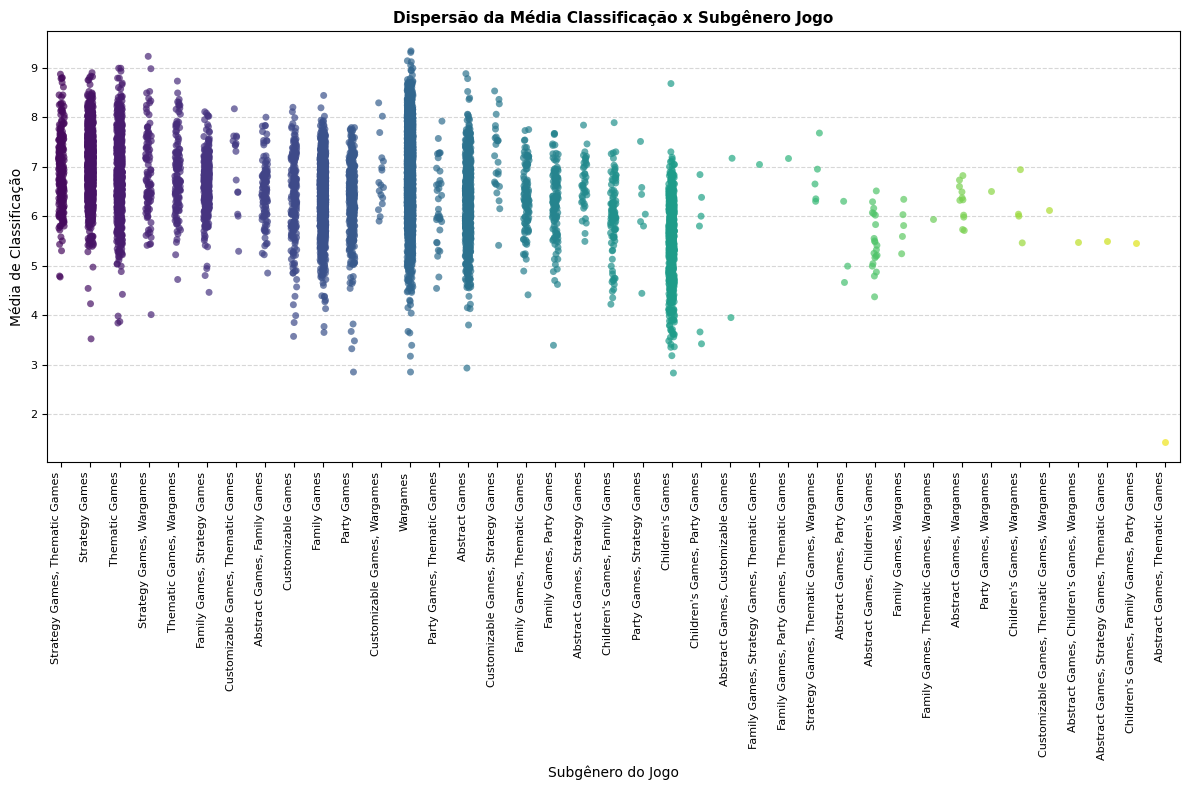

In [ ]:
# Stripplot gráfico categórico do Seaborn

# Define área de plotagem
plt.figure(figsize=(12, 8))

# Gráfico de dispersão por Subgênero
sns.stripplot(
    data=tabuleiro_curado,
    x='Subgenero Jogo',
    y='Media Classificacao',
    jitter=True,           # espalha os pontos horizontalmente
    alpha=0.7,
    palette='viridis'
)

# Personalização
plt.title('Dispersão da Média Classificação x Subgênero Jogo', fontsize=11, fontweight='bold')
plt.xlabel('Subgênero do Jogo')
plt.ylabel('Média de Classificação')
plt.xticks(rotation=90, ha='right', fontsize=9)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibir o gráfico.
plt.show()

📌**Comentário**: *Observa-se que jogos com poucos gêneros envolvidos — ou seja, mais centrados em temas específicos, como Strategy Games, Thematic Games, Wargames, Customizable Games, Children's Games, Party Games ou Abstract Games — tendem a apresentar médias de classificação mais elevadas, indicando um possível interesse maior dos usuários por jogos mais especializados. Em contrapartida, jogos que abrangem um número maior de gêneros exibem maior dispersão nas avaliações, o que pode refletir um interesse menos consistente por parte dos jogadores.*

#### 4.3. Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

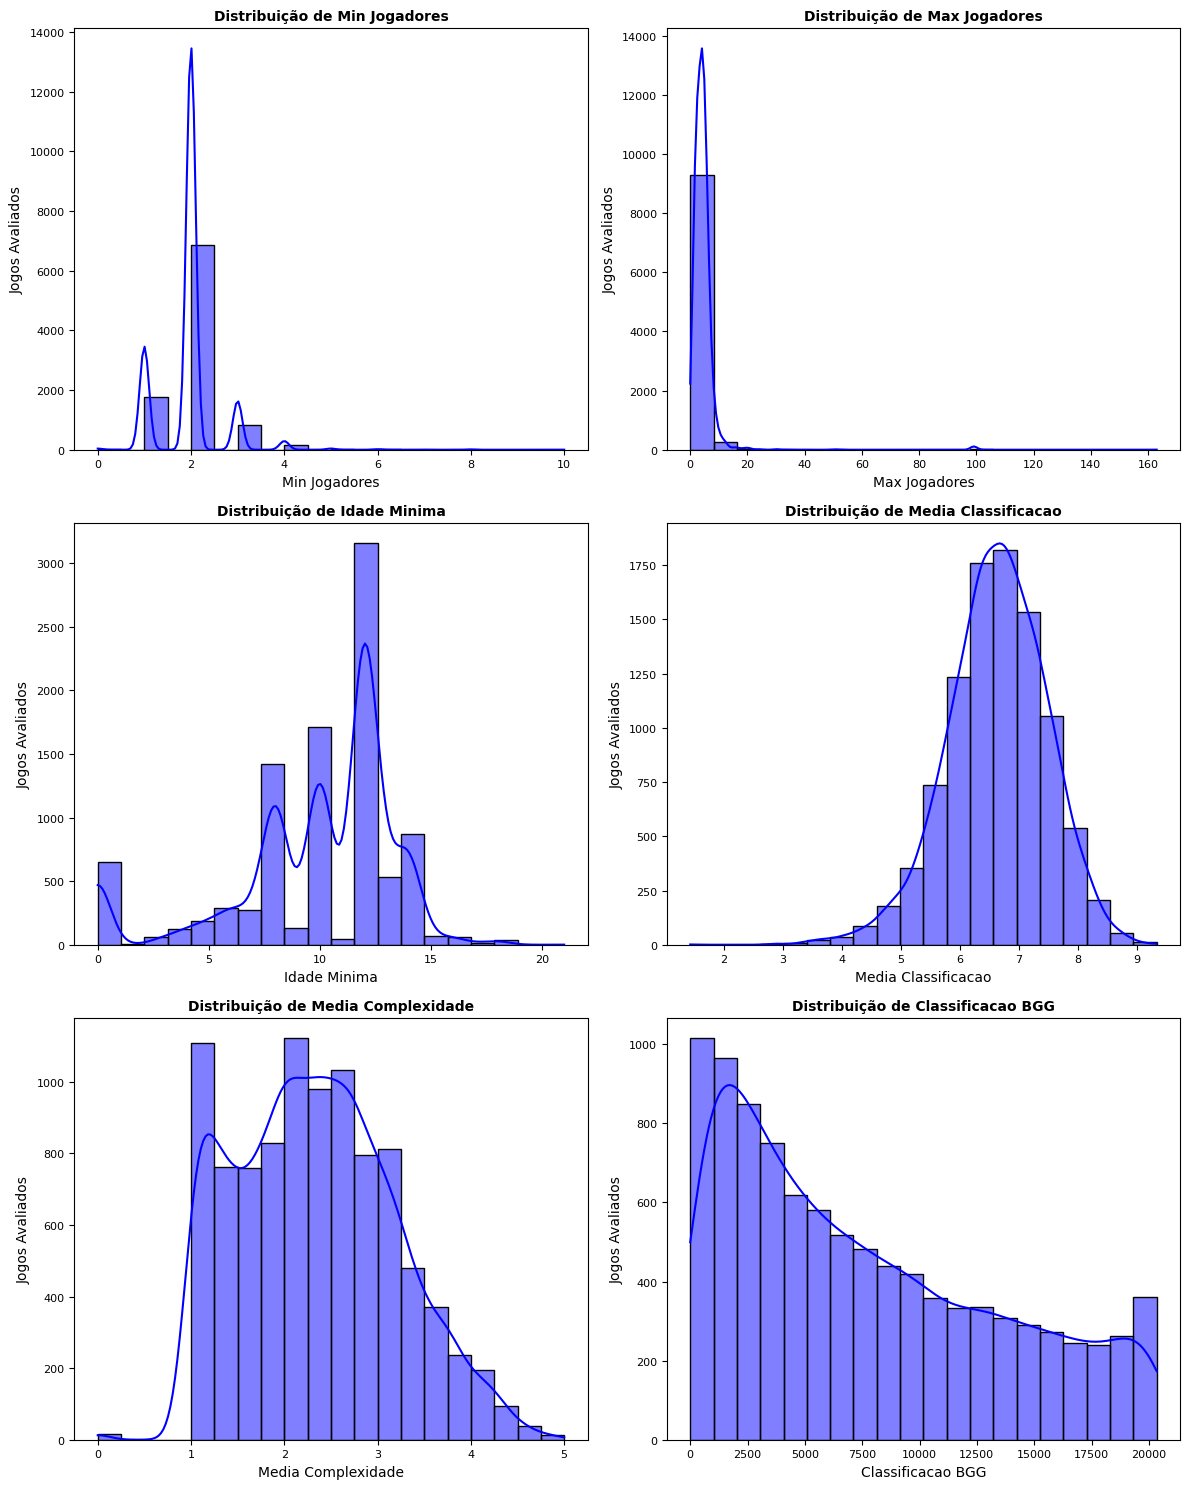

In [ ]:
# Definição das variáveis desejadas
variaveis_selecionadas = [
    "Min Jogadores", "Max Jogadores", "Idade Minima",
    "Media Classificacao", "Media Complexidade", "Classificacao BGG"
]  # Substitua pelos nomes reais das colunas desejadas

# Selecionando apenas as variáveis escolhidas
atributos_numericos = tabuleiro_curado[variaveis_selecionadas]

# Determinar o número de linhas e colunas para os subplots
num_vars = len(variaveis_selecionadas)
ncols = 2
nrows = math.ceil(num_vars / ncols)

# Criando subplots para melhor visualização
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5 * nrows))
axes = axes.flatten()  # Achata a matriz de eixos para facilitar a iteração

# Gerando histogramas com curvas KDE para cada variável selecionada
for i, coluna in enumerate(atributos_numericos.columns):
    sns.histplot(
        tabuleiro_curado[coluna],
        bins=20,
        kde=True,
        edgecolor='black',
        color='blue',
        alpha=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {coluna}', fontsize=10, fontweight='bold')
    axes[i].set_xlabel(coluna, fontsize=10)
    axes[i].set_ylabel('Jogos Avaliados', fontsize=10)

    # Diminuindo a fonte dos valores dos eixos x e y
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remover eixos extras, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuste organização do layout
plt.tight_layout()

# Exibir o gráfico.
plt.show()

📌**Comentário**: *Observa-se no gráfico de histogramas com curvas KDE acima, as distribuições das variáveis númericas do dataset. A partir daí, classificamos a forma da distribuição conforme o número de "picos" ou "modas" observados:  
-Unimodal (Apresenta apenas um pico principal): Max Jogadores e Classificacao BGG.  
-Bimodal (Exibe dois picos distintos): Media Complexidade.  
-Multimodal (Contém três ou mais picos): Min Jogadores, Idade Minima, Media Classificacao.*  
*A existência desses padrões de densidades diferentes nos alertam para a heterogeneidade presente em certas métricas do dataset.*

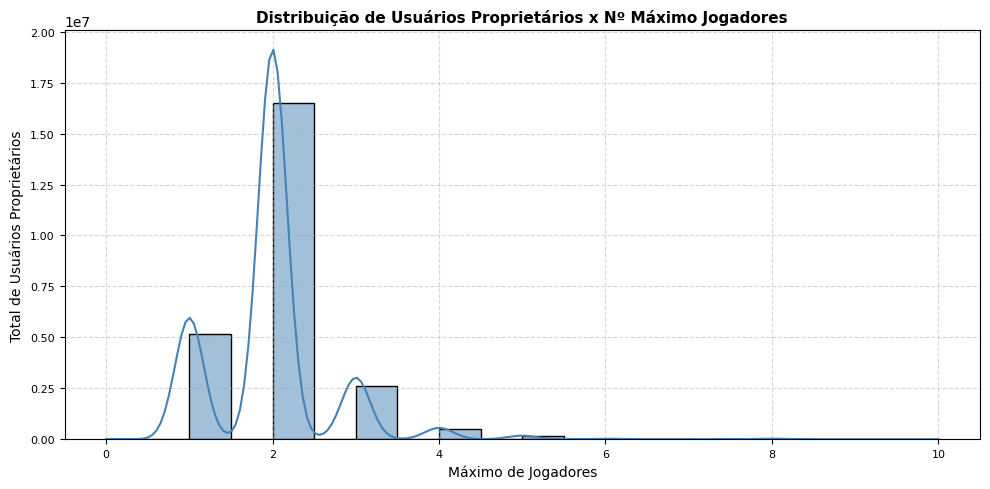

In [ ]:
# Define área de plotagem
plt.figure(figsize=(10, 5))

# Histograma de Max Jogadores com peso de quantidade de usuários
sns.histplot(
    data=tabuleiro_curado,
    x='Min Jogadores',
    weights='Usuario Proprietario',
    bins=20,
    kde=True,
    color='steelblue'
)

# Personalização
plt.title('Distribuição de Usuários Proprietários x Nº Máximo Jogadores', fontsize=11, fontweight='bold')
plt.xlabel('Máximo de Jogadores', fontsize=10)
plt.ylabel('Total de Usuários Proprietários', fontsize=10)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Exibir o gráfico.
plt.show()

📌**Comentário**: *A distribuição apresentada no gráfico acima revela uma leve tendência multimodal, caracterizada por pequenas elevações na densidade que sugerem o início de diferentes pontos de concentração. Esses indícios de múltiplas modas podem indicar a presença de subgrupos distintos no conjunto de dados, refletindo padrões variados de comportamento ou características heterogêneas entre as observações.*

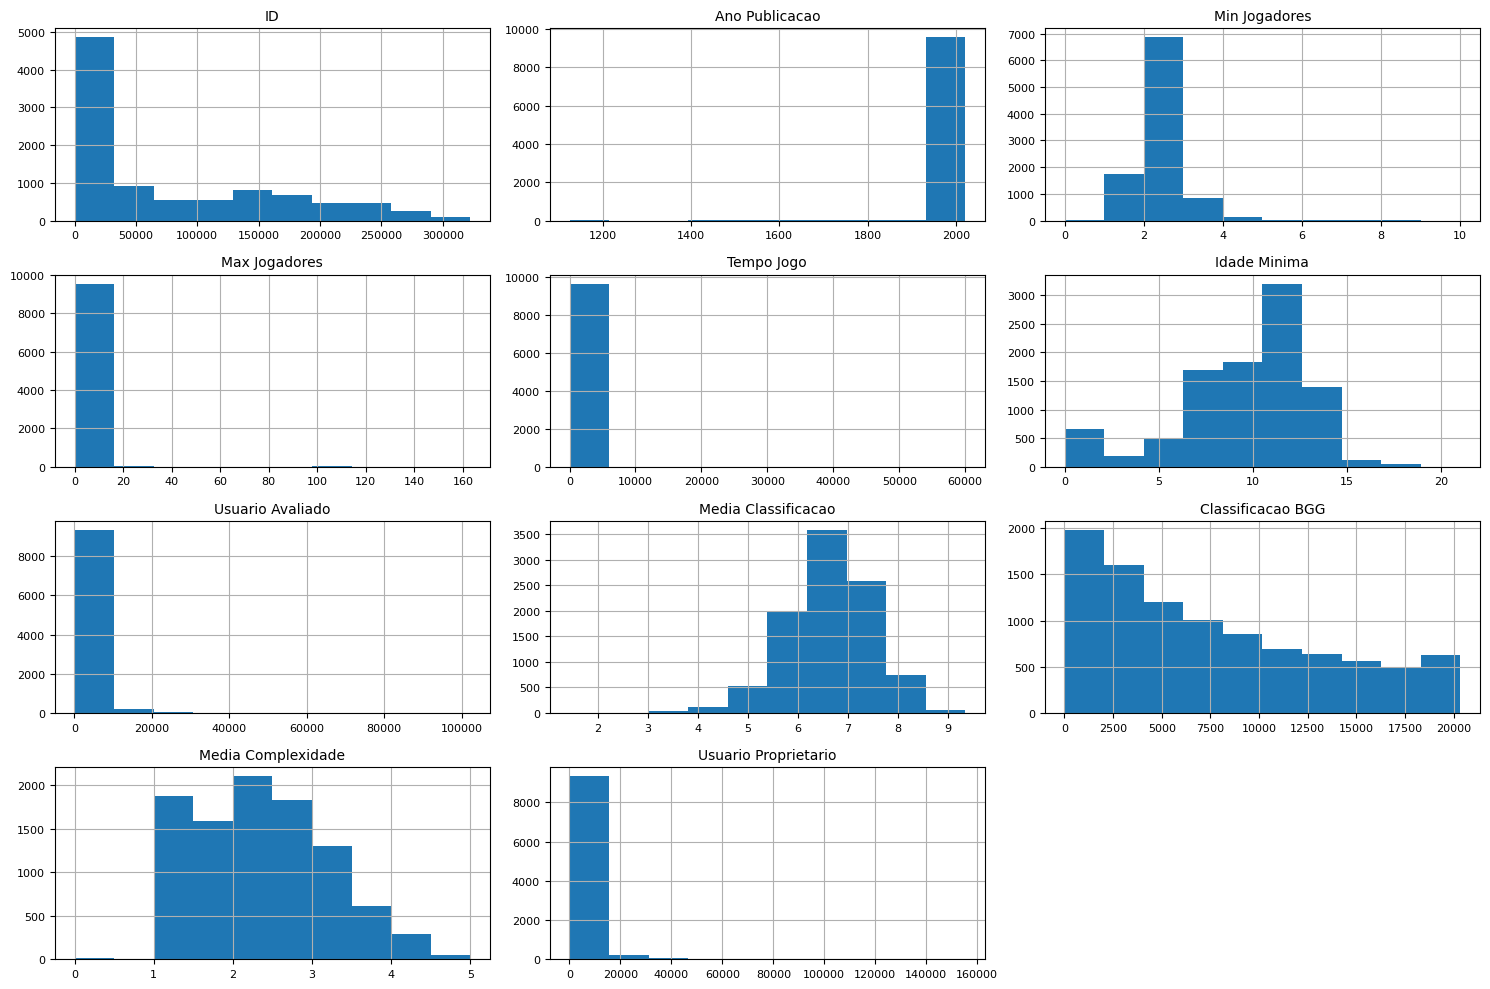

In [ ]:
# Gera histogramas das variáveis númericas

# Define área de plotagem
axes = tabuleiro_curado.hist(figsize=(15, 10))

# Ajuste o tamanho da fonte dos gráficos individuais
for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=8)  # Ajuste da fonte dos eixos x e y.
    ax.title.set_fontsize(10)   # Ajuste da fonte dos títulos.

# Ajuste organização do layout
plt.tight_layout()

# Exibir o gráfico.
plt.show()

📌**Comentário**: *Histogramas das variáveis númericas do dataset.*  
*Através dos gráficos acima, verifica-se a distribuição de frequências dos dados, com os diferentes tipos de distribuição.*

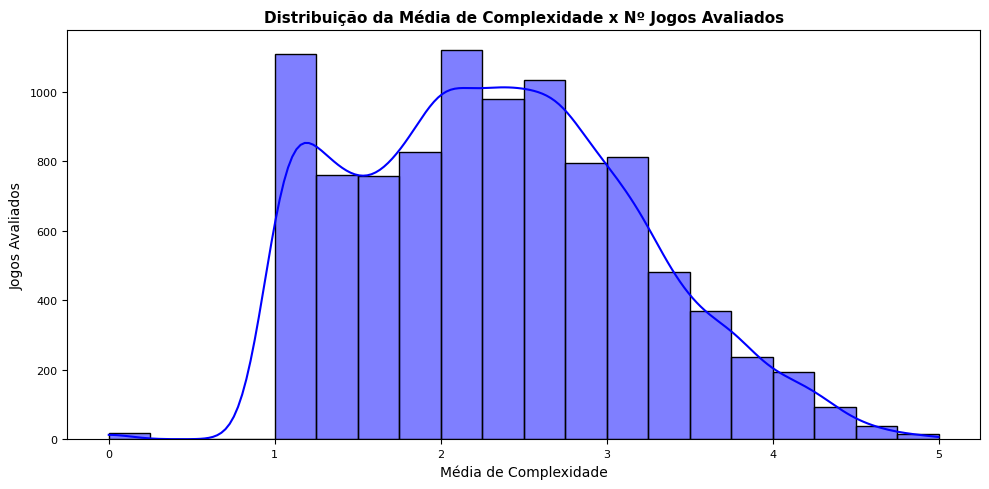

In [ ]:
# Criando o histograma e a curva KDE

# Define área de plotagem
plt.figure(figsize=(10, 5))

# Histograma com mais controle sobre transparência e bordas
sns.histplot(tabuleiro_curado['Media Complexidade'], bins=20, kde=True, edgecolor='black', color='blue', alpha=0.5)

# Incluindo título e legendas
plt.title('Distribuição da Média de Complexidade x Nº Jogos Avaliados', fontsize=11, fontweight='bold')
plt.xlabel('Média de Complexidade', fontsize=10)
plt.ylabel('Jogos Avaliados', fontsize=10)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.tight_layout()

# Exibir gráfico
plt.show()

📌**Comentário**: *A distribuição apresentada no gráfico revela uma leve tendência bimodal, com destaque para uma concentração da média de complexidade entre 1 e 3 para o número de jogos avaliados. Esse padrão sugere que uma parcela significativa dos jogos está agrupada em níveis de complexidade considerados "baixos" a "moderados", o que pode refletir uma preferência do público por jogos.*

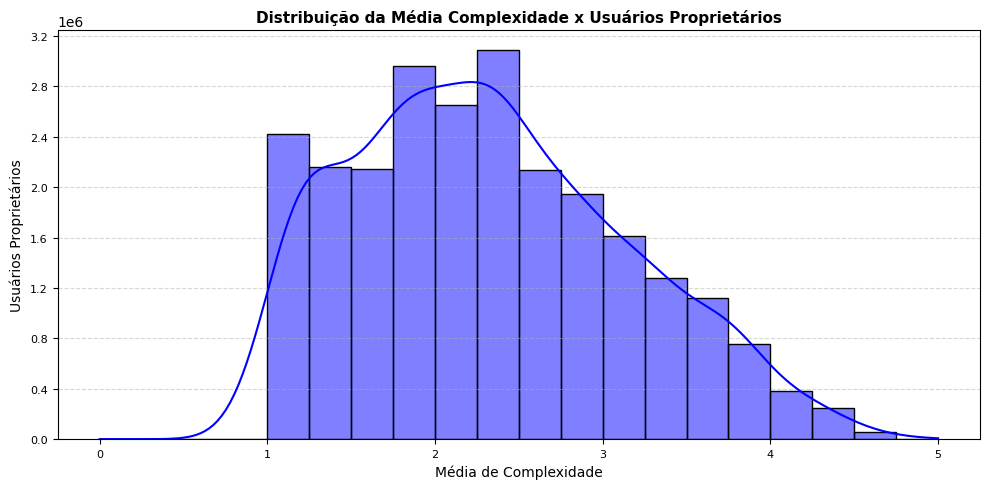

In [ ]:
# Define área de plotagem
plt.figure(figsize=(10, 5))

# Criando o histograma
sns.histplot(x=tabuleiro_curado['Media Complexidade'], weights=tabuleiro_curado['Usuario Proprietario'], bins=20, kde=True, edgecolor='black', color='blue', alpha=0.5)

# Configurações do gráfico
plt.title('Distribuição da Média Complexidade x Usuários Proprietários', fontsize=11, fontweight='bold')
plt.xlabel('Média de Complexidade', fontsize=10)
plt.ylabel('Usuários Proprietários', fontsize=10)
plt.grid(axis="y", linestyle="dashed", alpha=0.5)

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Configurando o eixo Y para exibir apenas valores inteiros
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Ajuste organização do layout
plt.tight_layout()

# Exibir gráfico
plt.show()

📌**Comentário**: *A distribuição apresentada no gráfico revela uma leve tendência unimodal, com destaque para uma concentração da média de complexidade entre 1 e 2,5 para o número de usuários proprietários. Esse padrão sugere que uma parcela significativa dos usuários está agrupada em níveis de complexidade considerados "baixos" a "moderados", o que pode refletir uma preferência do público por jogos.*

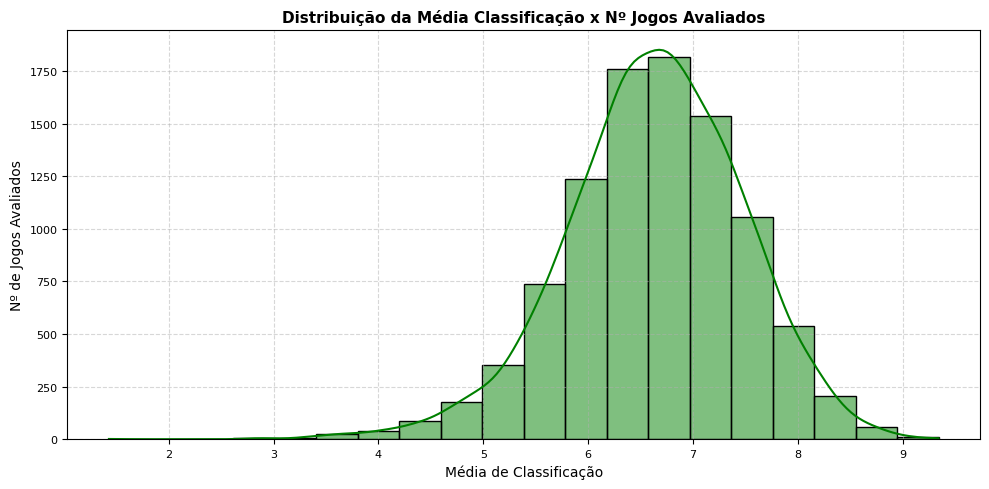

In [ ]:
# Cria uma figura e um eixo para o gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Plota o histograma de "Media Classificacao" com curva KDE
sns.histplot(
    data=tabuleiro_curado,       # DataFrame com os dados
    x='Media Classificacao',     # Variável de interesse
    bins=20,                     # Número de bins
    kde=True,                    # Ativa a estimativa de densidade
    edgecolor='black',           # Borda preta para os bins
    color='green',               # Cor dos bins
    alpha=0.5,                   # Transparência
    ax=ax                        # Utiliza o eixo definido
)

# Configura títulos e rótulos com fontes ajustadas
ax.set_title('Distribuição da Média Classificação x Nº Jogos Avaliados', fontsize=11, fontweight='bold')
ax.set_xlabel('Média de Classificação', fontsize=10)
ax.set_ylabel('Nº de Jogos Avaliados', fontsize=10)

# Diminuindo a fonte dos valores dos eixos x e y
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Adiciona grid para melhor visualização
ax.grid(True, linestyle='--', alpha=0.5)

# Ajuste organização do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Comentário:** *Observa-se uma concentração de jogos avaliados cujas médias de classificação variam entre 5 e 8. Esse intervalo sugere uma predominância de avaliações intermediárias a altas, indicando uma tendência dos usuários em avaliar a maioria dos jogos dentro dessa faixa. Essa distribuição unimodal pode refletir critérios de qualidade, preferências dos avaliadores ou características comuns entre os jogos bem classificados.*

#### 4.4. Boxplot

Também conhecido como diagrama de caixa, é um gráfico estatístico que resume a distribuição de uma variável numérica com base em cinco medidas principais: mínimo, primeiro quartil, mediana, terceiro quartil e máximo. Ele é amplamente utilizado para identificar dispersão, assimetria e valores atípicos (outliers) em um conjunto de dados.

In [ ]:
# Verificando a presença de valores nulos (missing).
valores_nulos = tabuleiro_curado.isnull().sum()
print(valores_nulos)

ID                      0
Nome Jogo               0
Ano Publicacao          0
Min Jogadores           0
Max Jogadores           0
Tempo Jogo              0
Idade Minima            0
Usuario Avaliado        0
Media Classificacao     0
Classificacao BGG       0
Media Complexidade      0
Usuario Proprietario    0
Mecanica Jogo           0
Subgenero Jogo          0
dtype: int64


In [ ]:
# Selecionando as colunas para serem agrupadas por Subgenero Jogo.
colunas_selecionadas = ['Media Classificacao', 'Media Complexidade']
resultado = tabuleiro_curado.groupby('Subgenero Jogo')[colunas_selecionadas].describe()

# Substitui os valores ausentes <NA> por 0.
# O <NA> aparece, pois não possui amostras suficientes para calcular determinadas estatísticas.
resultado.style.format(na_rep='0')

In [ ]:
# Exibir as informações do tabuleiro curado.
tabuleiro_curado.head()

ID                          Nome Jogo  Ano Publicacao  Min Jogadores  \
0  174430                         Gloomhaven            2017              1   
1  161936          Pandemic Legacy: Season 1            2015              2   
2  224517                  Brass: Birmingham            2018              2   
3  167791                  Terraforming Mars            2016              1   
4  233078  Twilight Imperium: Fourth Edition            2017              3   

   Max Jogadores  Tempo Jogo  Idade Minima  Usuario Avaliado  \
0              4         120            14             42055   
1              4          60            13             41643   
2              4         120            14             19217   
3              5         120            12             64864   
4              6         480            14             13468   

   Media Classificacao  Classificacao BGG  Media Complexidade  \
0                 8.79                  1                3.86   
1                 8.61                  2                2.84   
2                 8.66                  3                3.91   
3                 8.43                  4                3.24   
4                  8.7                  5                4.22   

   Usuario Proprietario                                      Mecanica Jogo  \
0                 68323  Action Queue, Action Retrieval, Campaign / Bat...   
1                 65294  Action Points, Cooperative Game, Hand Manageme...   
2                 28785  Hand Management, Income, Loans, Market, Networ...   
3                 87099  Card Drafting, Drafting, End Game Bonuses, Han...   
4                 16831  Action Drafting, Area Majority / Influence, Ar...   

                   Subgenero Jogo  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

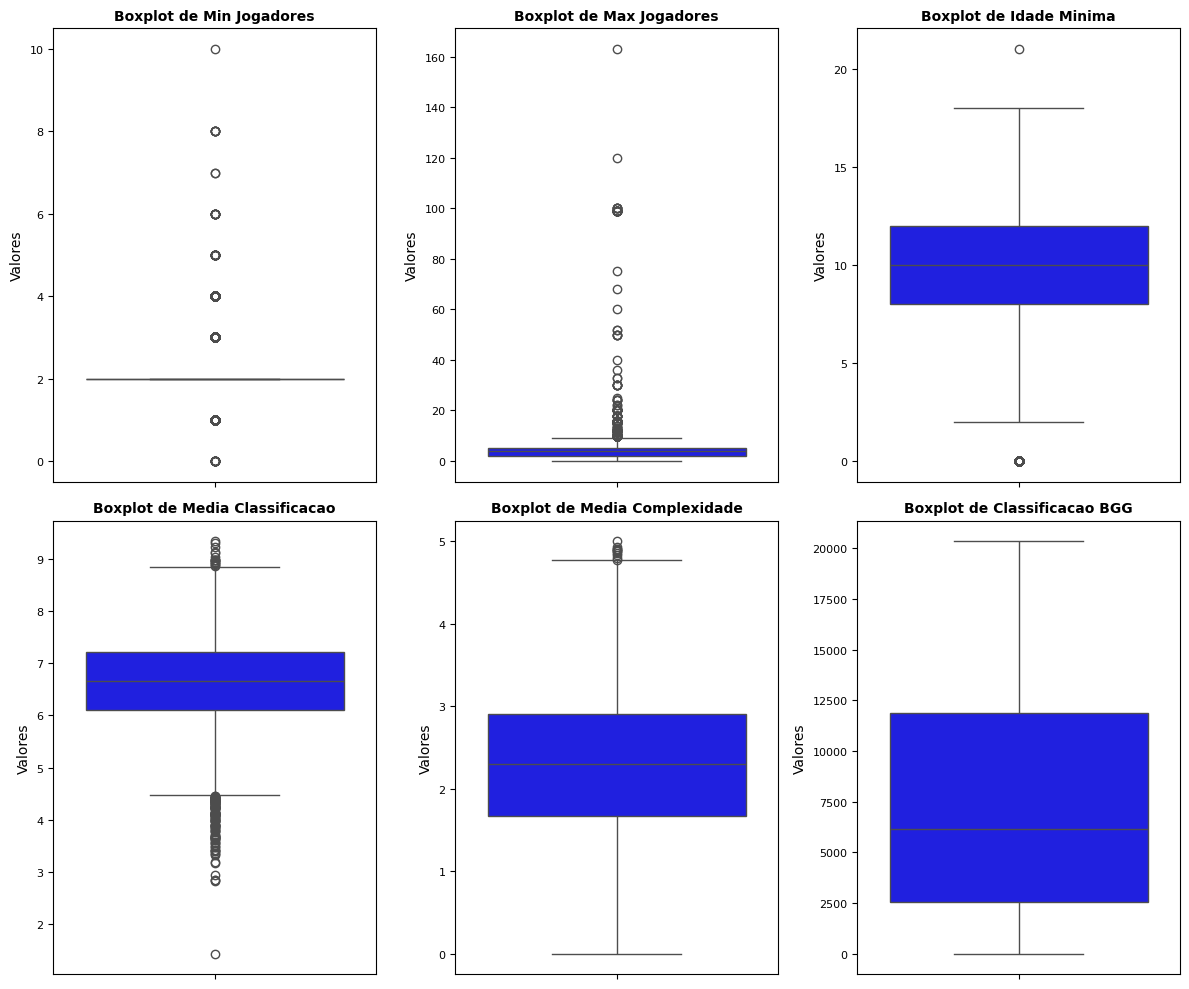

In [ ]:
# Definição das variáveis desejadas
variaveis_selecionadas = ["Min Jogadores", "Max Jogadores", "Idade Minima",
                          "Media Classificacao", "Media Complexidade", "Classificacao BGG"]  # Substitua pelos nomes reais das colunas desejadas

# Selecionando apenas as variáveis escolhidas
atributos_numericos = tabuleiro_curado[variaveis_selecionadas]

# Definir número de linhas e colunas
num_atributos = len(atributos_numericos.columns)
num_colunas = 3
num_linhas = math.ceil(num_atributos / num_colunas)  # Calcula o número necessário de linhas

# Criando a figura com múltiplos subplots
fig, axes = plt.subplots(nrows=num_linhas, ncols=num_colunas, figsize=(12, 5 * num_linhas))
axes = axes.flatten()  # Transforma os eixos em uma lista para fácil iteração

# Gerando boxplots para cada atributo
for i, coluna in enumerate(atributos_numericos.columns):
    sns.boxplot(y=tabuleiro_curado[coluna], ax=axes[i], color='blue')
    axes[i].set_title(f'Boxplot de {coluna}', fontsize=10, fontweight='bold')
    axes[i].set_ylabel('Valores', fontsize=10)

    # Diminuindo a fonte dos valores dos eixos y
    axes[i].tick_params(axis='y', labelsize=8)

# Remover subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajuste organização do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Comentário**: Obeserva-se o graficos de boxplox de todas as variáveis numérica do dataset, onde permite visualizar os outliers e concentração dos valores de cada variavel.

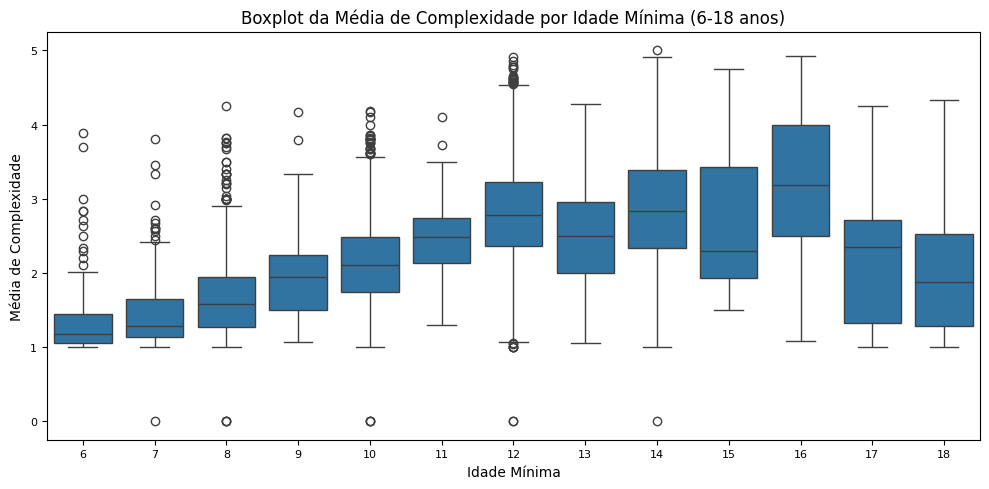

In [ ]:
# Filtra os dados para Idade Mínima entre 6 e 14
tabuleiro_filtrado = tabuleiro_curado[(tabuleiro_curado['Idade Minima'] >= 6) & (tabuleiro_curado['Idade Minima'] <= 18)]

# Criando o boxplot com os dados filtrados
plt.figure(figsize=(10, 5))
sns.boxplot(x='Idade Minima', y='Media Complexidade', data=tabuleiro_filtrado)

plt.title('Boxplot da Média de Complexidade por Idade Mínima (6-18 anos)')
plt.xlabel('Idade Mínima')
plt.ylabel('Média de Complexidade')

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário**: *O boxplot da Idade Mínima em função da Média de Complexidade demonstra um aumento gradual nas concentrações de idade conforme cresce o nível médio de complexidade dos jogos. No entanto, observa-se uma tendência de queda para idades superiores a 17 anos, sugerindo uma possível saturação ou menor oferta de jogos com alta complexidade voltados a esse público. Além disso, há uma presença crescente de outliers entre as idades inferiores a 12 anos, indicando maior variabilidade ou casos pontuais fora do padrão esperado nesse intervalo.*

#### 4.5. Matriz de Correlação

A matriz de correlação avalia a força e a direção das relações lineares entre variáveis numéricas. Valores próximos de 1 indicam uma forte correlação positiva, valores próximos de -1 indicam uma forte correlação negativa, enquanto valores próximos de 0 sugerem ausência de correlação linear.

In [ ]:
# Matriz de correlação - variáveis númericas.
print("\nMatriz de correlação - Variáveis númericas:")
tabuleiro_curado.select_dtypes(include='number').corr()


Matriz de correlação - Variáveis númericas:


ID  Ano Publicacao  Min Jogadores  Max Jogadores  \
ID                    1.000000        0.378346      -0.165041       0.013798   
Ano Publicacao        0.378346        1.000000      -0.040845      -0.025176   
Min Jogadores        -0.165041       -0.040845       1.000000       0.190598   
Max Jogadores         0.013798       -0.025176       0.190598       1.000000   
Tempo Jogo           -0.012745       -0.006254       0.045776      -0.006710   
Idade Minima          0.087099        0.046444       0.013627       0.000937   
Usuario Avaliado      0.078366        0.033645       0.021792       0.038666   
Media Classificacao   0.463273        0.250798      -0.164148      -0.044987   
Classificacao BGG    -0.404124       -0.238937       0.011709      -0.033530   
Media Complexidade    0.028928        0.030545      -0.178310      -0.124379   
Usuario Proprietario  0.113282        0.044116       0.010445       0.043877   

                      Tempo Jogo  Idade Minima  Usuario Avaliado  \
ID                     -0.012745      0.087099          0.078366   
Ano Publicacao         -0.006254      0.046444          0.033645   
Min Jogadores           0.045776      0.013627          0.021792   
Max Jogadores          -0.006710      0.000937          0.038666   
Tempo Jogo              1.000000      0.031653         -0.022594   
Idade Minima            0.031653      1.000000          0.081682   
Usuario Avaliado       -0.022594      0.081682          1.000000   
Media Classificacao     0.096822      0.204516          0.193862   
Classificacao BGG      -0.009999     -0.246419         -0.316713   
Media Complexidade      0.194619      0.318113          0.005609   
Usuario Proprietario   -0.022076      0.088713          0.985921   

                      Media Classificacao  Classificacao BGG  \
ID                               0.463273          -0.404124   
Ano Publicacao                   0.250798          -0.238937   
Min Jogadores                   -0.164148           0.011709   
Max Jogadores                   -0.044987          -0.033530   
Tempo Jogo                       0.096822          -0.009999   
Idade Minima                     0.204516          -0.246419   
Usuario Avaliado                 0.193862          -0.316713   
Media Classificacao              1.000000          -0.709992   
Classificacao BGG               -0.709992           1.000000   
Media Complexidade               0.524458          -0.225743   
Usuario Proprietario             0.196748          -0.327862   

                      Media Complexidade  Usuario Proprietario  
ID                              0.028928              0.113282  
Ano Publicacao                  0.030545              0.044116  
Min Jogadores                  -0.178310              0.010445  
Max Jogadores                  -0.124379              0.043877  
Tempo Jogo                      0.194619             -0.022076  
Idade Minima                    0.318113              0.088713  
Usuario Avaliado                0.005609              0.985921  
Media Classificacao             0.524458              0.196748  
Classificacao BGG              -0.225743             -0.327862  
Media Complexidade              1.000000             -0.002485  
Usuario Proprietario           -0.002485              1.000000

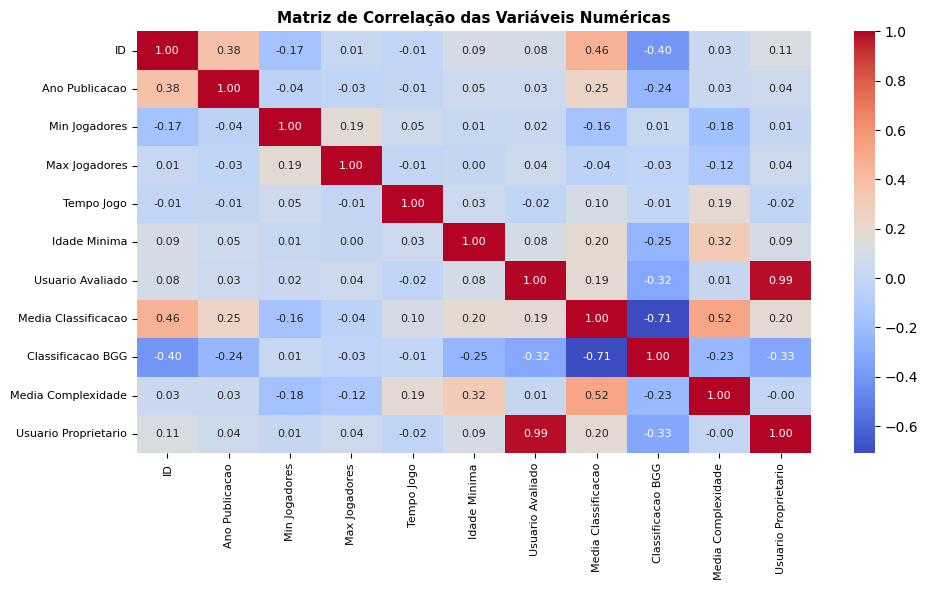

In [ ]:
# Selecionar apenas colunas numéricas
dados_numericos = tabuleiro_curado.select_dtypes(include='number')

# Criar o mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(
    dados_numericos.corr(),
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 8},            # Tamanho da fonte dos valores no interior das células
    cbar_kws={"shrink": 1.0}          # Opcional: ajusta o tamanho da barra de cores
)

# Personalizar os rótulos dos eixos
plt.xticks(fontsize=9, rotation=90)
plt.yticks(fontsize=9, rotation=0)

# Personalizar o Título
plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=11, fontweight='bold')

# Diminuindo a fonte dos valores dos eixos x e y
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)

# Ajuste organização do layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

📌**Cometário**: *O mapa de calor da matriz de correlação revela correlações negativas sutis entre a Média de Classificação e a Média de Complexidade em relação ao Número Máximo e ao Número Mínimo de Jogadores. Esse padrão sugere que, à medida que um jogo exige mais ou menos participantes ou apresenta maior complexidade, sua média de avaliação tende a diminuir. Isso pode indicar que jogos mais exigentes ou com restrições quanto à quantidade de jogadores recebem avaliações menos favoráveis, possivelmente devido à menor acessibilidade ou ao nível de exigência para os participantes.*
*Por outro lado, a Idade Mínima mostra correlações ligeiramente positivas com a Média de Complexidade, a Média de Classificação, o Número de Avaliações dos usuários e o Tempo de Jogo. Isso sugere que jogos voltados a faixas etárias mais elevadas tendem a ser mais complexos, a receber melhores avaliações e a ter sessões de jogo mais longas. Esses fatores podem refletir a preferência de jogadores mais experientes por desafios mais intensos, o que contribui para uma experiência mais imersiva e bem avaliada.*

###⚙️ 5. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa essencial para converter informações brutas em um formato estruturado e adequado para a modelagem. Ao garantir a padronização e a organização dos dados, essa fase desempenha um papel crucial na otimização do desempenho dos algoritmos, contribuindo para análises mais precisas e confiáveis.  
Cabe ressaltar que a limpeza dos dados já foi abordada em tópicos anteriores. Nesta seção, o foco se volta para a aplicação de transformações, a codificação eficiente dos atributos e a separação e extração dos conjuntos de variáveis. Essas operações atuam em conjunto para aprimorar a qualidade dos dados, maximizar a performance dos modelos e fundamentar conclusões mais robustas e seguras.


#### 5.1. Treino e teste
As etapas de treinamento e teste juntos garantem que o modelo não apenas aprenda os padrões presentes nos dados, mas também seja capaz de aplicá-los de forma confiável em novos cenários, promovendo uma melhor generalização e robustez nas previsões.

In [ ]:
# Seleção das variaveis
variaveis_selecionadas = ["Min Jogadores", "Max Jogadores", "Idade Minima",
                          "Media Classificacao", "Media Complexidade", "Classificacao BGG"]
tabuleiro_curado_filtro = tabuleiro_curado[variaveis_selecionadas]

In [ ]:
# Separar features (X) e target (y):
# features = características, atributos, variáveis independentes, ou seja, os dados de entrada que descrevem os exemplos e alimentam o modelo.
# target = variável dependente que deseja prever.
X = tabuleiro_curado_filtro.drop('Idade Minima', axis=1)   # Remove a coluna alvo, mantendo apenas as features.
y = tabuleiro_curado_filtro['Idade Minima']                # Define a variável alvo.

In [ ]:
# Verificar a distribuição das classes em y
print("Distribuição por:", y.value_counts())

# Dividir os dados de treino=80% e testes 20%.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42                   # 0.2 = Propoporção 80% / 20%
)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste.:", X_test.shape)

Distribuição por: Idade Minima
12    3156
10    1711
8     1424
14     870
0      654
13     534
6      289
7      270
5      189
9      129
4      127
15      65
3       64
16      62
11      46
18      34
17      13
2        6
21       1
Name: count, dtype: int64
Tamanho do conjunto de treino: (7715, 5)
Tamanho do conjunto de teste.: (1929, 5)


In [ ]:
# Exibindo as dimensões do Treino e Testes:
print("Dimensões de treino e testes:\n")
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de treino e testes:

Dimensões de X_train: (7715, 5)
Dimensões de X_test: (1929, 5)
Dimensões de y_train: (7715,)
Dimensões de y_test: (1929,)


#### 5.2. Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Verificando o RANGE (intervalo) dos valores.
valores_minimos = tabuleiro_curado.min(numeric_only=True) # Valores mínimos:
valores_maximos = tabuleiro_curado.max(numeric_only=True) # Valores máximos:

# Criando DataFrame com os resultados.
range_valores = pd.DataFrame({'Mínimos por coluna': valores_minimos, 'Máximos por coluna': valores_maximos})

# Exibindo a tabela formatada.
print(range_valores)

                      Mínimos por coluna  Máximos por coluna
ID                                   1.0            322289.0
Ano Publicacao                    1125.0              2021.0
Min Jogadores                        0.0                10.0
Max Jogadores                        0.0               163.0
Tempo Jogo                           0.0             60000.0
Idade Minima                         0.0                21.0
Usuario Avaliado                    30.0            102214.0
Media Classificacao                 1.43                9.34
Classificacao BGG                    1.0             20342.0
Media Complexidade                   0.0                 5.0
Usuario Proprietario                 3.0            155312.0


In [ ]:
# Lista de colunas numéricas para normalização
# Normalizando somente as variaveis cujo range é grande.
colunas_numericas = [
    'ID',
    # 'Ano Publicacao',
    # 'Min Jogadores',
    'Max Jogadores',
    'Tempo Jogo',
     # 'Idade Minima',
    'Usuario Avaliado',
    'Media Classificacao',
    'Classificacao BGG',
    'Media Complexidade',
    'Usuario Proprietario'
]

# Lista de colunas categóricas
colunas_categoricas = [
    'Nome Jogo',
    'Mecanica Jogo',
    'Subgenero Jogo'
]

# Separar os dados
dados_numericos = tabuleiro_curado[colunas_numericas]
dados_categoricos = tabuleiro_curado[colunas_categoricas]

# Aplicar normalização
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)

# Criar DataFrame normalizado com os mesmos nomes das colunas
df_normalizado = pd.DataFrame(dados_normalizados, columns=colunas_numericas)

# Concatenar com os dados categóricos
tabuleiro_normalizado = pd.concat([df_normalizado, dados_categoricos], axis=1)

In [ ]:
# Verificando os dados normalizados
tabuleiro_normalizado.head()

ID  Max Jogadores  Tempo Jogo  Usuario Avaliado  Media Classificacao  \
0  0.541221       0.024540       0.002          0.411268             0.930468   
1  0.502454       0.024540       0.001          0.407236             0.907712   
2  0.696632       0.024540       0.002          0.187769             0.914033   
3  0.520621       0.030675       0.002          0.634483             0.884956   
4  0.723195       0.036810       0.008          0.131508             0.919090   

   Classificacao BGG  Media Complexidade  Usuario Proprietario  \
0           0.000000               0.772              0.439897   
1           0.000049               0.568              0.420394   
2           0.000098               0.782              0.185321   
3           0.000147               0.648              0.560792   
4           0.000197               0.844              0.108352   

                           Nome Jogo  \
0                         Gloomhaven   
1          Pandemic Legacy: Season 1   
2                  Brass: Birmingham   
3                  Terraforming Mars   
4  Twilight Imperium: Fourth Edition   

                                       Mecanica Jogo  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                   Subgenero Jogo  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

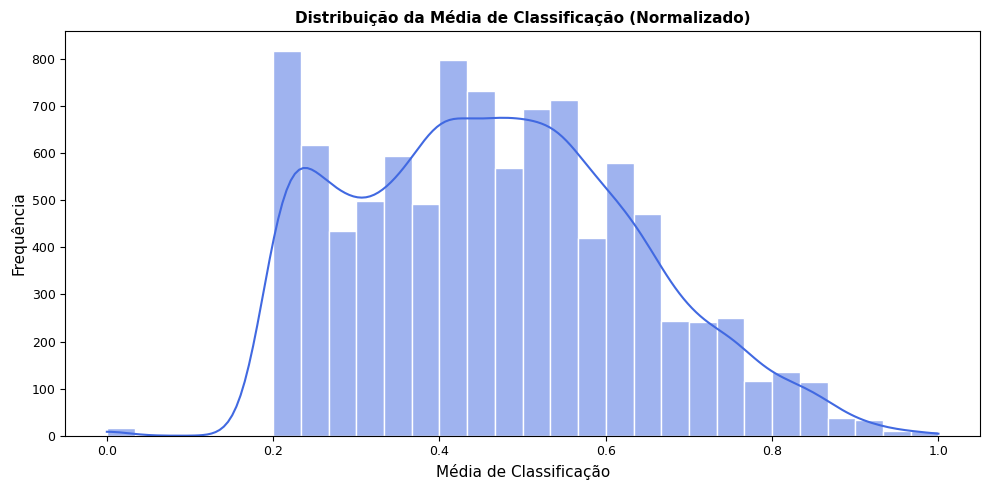

In [ ]:
# Visualização da distribuição após a normalização

# Define área de plotagem
plt.figure(figsize=(10, 5))

sns.histplot(
    tabuleiro_normalizado['Media Complexidade'],
    kde=True,
    color='royalblue',
    edgecolor='white',
    bins=30
)

plt.title('Distribuição da Média de Classificação (Normalizado)', fontsize=11, fontweight='bold')
plt.xlabel('Média de Classificação', fontsize=11)
plt.ylabel('Frequência', fontsize=11)

# Tamanho da fonte dos rótulos dos eixos X e Y
plt.tick_params(axis='both', labelsize=9)

# Evita sobreposição de elementos
plt.tight_layout()
plt.show()

📌**Comentário:** *O histograma de Media Classificacao após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original, ou seja, uma distribuição ligeiramente bimodal.*

#### 5.3. Padronização

*A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. Essa transformação é especialmente útil quando as variáveis estão em escalas diferentes, pois evita que variáveis com valores maiores dominem algoritmos sensíveis à escala.*

In [ ]:
# Lista de colunas numéricas para padronização
colunas_numericas = [
    #'ID',
    #'Ano Publicacao',
    'Min Jogadores',
    'Max Jogadores',
    'Tempo Jogo',
    'Idade Minima',
    'Usuario Avaliado',
    'Media Classificacao',
    'Classificacao BGG',
    'Media Complexidade',
    'Usuario Proprietario'
]

# Lista de colunas categóricas
colunas_categoricas = [
    'Nome Jogo',
    'Mecanica Jogo',
    'Subgenero Jogo'
]

# Separar os dados numéricos e categóricos do dataset original
dados_numericos = tabuleiro_curado[colunas_numericas]
dados_categoricos = tabuleiro_curado[colunas_categoricas]

# Aplicar padronização (média 0 e desvio padrão 1)
scaler = StandardScaler()
dados_padronizados = scaler.fit_transform(dados_numericos)

# Criar um novo DataFrame com os dados padronizados, mantendo os mesmos nomes de colunas
df_padronizado = pd.DataFrame(dados_padronizados, columns=colunas_numericas)

# Concatenar o DataFrame padronizado com os dados categóricos
tabuleiro_padronizado = pd.concat([df_padronizado, dados_categoricos], axis=1)

In [ ]:
# Verificando os dados padronizados
tabuleiro_padronizado.head()

Min Jogadores  Max Jogadores  Tempo Jogo  Idade Minima  Usuario Avaliado  \
0      -1.493058      -0.096036   -0.023469      1.126391          8.123338   
1       0.084920      -0.096036   -0.100408      0.853117          8.040579   
2       0.084920      -0.096036   -0.023469      1.126391          3.535817   
3      -1.493058       0.045429   -0.023469      0.579843         12.705034   
4       1.662898       0.186893    0.438165      1.126391          2.381002   

   Media Classificacao  Classificacao BGG  Media Complexidade  \
0             2.536686          -1.299140            1.811901   
1             2.325214          -1.298968            0.603272   
2             2.383956          -1.298797            1.871147   
3             2.113742          -1.298625            1.077244   
4             2.430950          -1.298454            2.238475   

   Usuario Proprietario                          Nome Jogo  \
0              9.244786                         Gloomhaven   
1              8.818790          Pandemic Legacy: Season 1   
2              3.684189                  Brass: Birmingham   
3             11.885430                  Terraforming Mars   
4              2.002987  Twilight Imperium: Fourth Edition   

                                       Mecanica Jogo  \
0  Action Queue, Action Retrieval, Campaign / Bat...   
1  Action Points, Cooperative Game, Hand Manageme...   
2  Hand Management, Income, Loans, Market, Networ...   
3  Card Drafting, Drafting, End Game Bonuses, Han...   
4  Action Drafting, Area Majority / Influence, Ar...   

                   Subgenero Jogo  
0  Strategy Games, Thematic Games  
1  Strategy Games, Thematic Games  
2                  Strategy Games  
3                  Strategy Games  
4  Strategy Games, Thematic Games

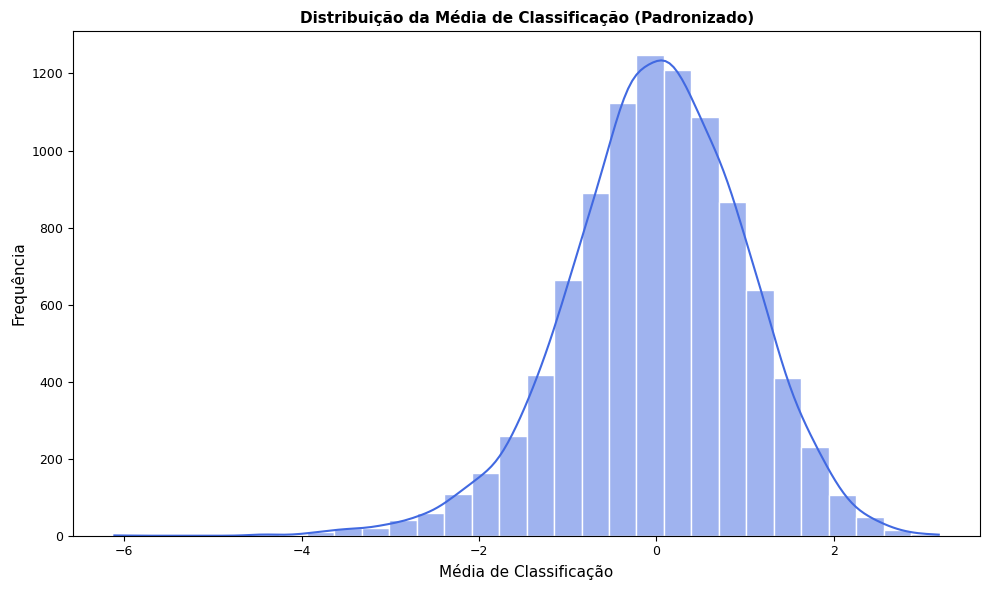

In [ ]:
# Visualização da distribuição após a padronização.

# Define área de plotagem
plt.figure(figsize=(10, 6))

sns.histplot(
    tabuleiro_padronizado['Media Classificacao'],
    kde=True,
    color='royalblue',
    edgecolor='white',
    bins=30
)

plt.title('Distribuição da Média de Classificação (Padronizado)', fontsize=11, fontweight='bold')
plt.xlabel('Média de Classificação', fontsize=11)
plt.ylabel('Frequência', fontsize=11)

# Tamanho da fonte dos rótulos dos eixos X e Y
plt.tick_params(axis='both', labelsize=9)

# Evita sobreposição de elementos
plt.tight_layout()

# Mostrar gráfico
plt.show()

📌**Cometário**: *O histograma de Media Classificacao após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, tendo uma distribuição monomodal centralizando a distribuição em um pico entorno do zero.*

#### 5.4. Tratamento de Valores Nulos

O dataset original Board-Games (Jogos de Tabuleiro) apresenta valores ausentes (nulos) em alguns dos seus atributos. O processo de identificação e tratamento dessas inconsistências foi devidamente abordado e executado conforme descrito em seção anterior.

In [ ]:
# Observa-se que não há presença de valores nulos no dataset atual (considerando que as linhas acimas foram executadas).
print("dataset: Board-Games (Jogos de Tabuleiro)")
print("\nQuantidade de valores nulos em cada vaiável no dataset curado:")
print(tabuleiro_curado.isnull().sum())
print("\nQuantidade de instâncias em cada variável no dataset curado:")
print(tabuleiro_curado.count())

dataset: Board-Games (Jogos de Tabuleiro)

Quantidade de valores nulos em cada vaiável no dataset curado:
ID                      0
Nome Jogo               0
Ano Publicacao          0
Min Jogadores           0
Max Jogadores           0
Tempo Jogo              0
Idade Minima            0
Usuario Avaliado        0
Media Classificacao     0
Classificacao BGG       0
Media Complexidade      0
Usuario Proprietario    0
Mecanica Jogo           0
Subgenero Jogo          0
dtype: int64

Quantidade de instâncias em cada variável no dataset curado:
ID                      9644
Nome Jogo               9644
Ano Publicacao          9644
Min Jogadores           9644
Max Jogadores           9644
Tempo Jogo              9644
Idade Minima            9644
Usuario Avaliado        9644
Media Classificacao     9644
Classificacao BGG       9644
Media Complexidade      9644
Usuario Proprietario    9644
Mecanica Jogo           9644
Subgenero Jogo          9644
dtype: int64


#### 5.5. Outras Transformações e Etapas de Pré-Processamento

-Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering).

*Ao longo da análise, foram aplicadas etapas adicionais de pré-processamento, incluindo a seleção de características. Esse processo permitiu identificar variáveis específicas, reduzindo a quantidade de informações e tornando a análise mais eficiente e a interpretação dos dados mais clara.*
*A criação de novas características (feature engineering) não foi necessária, uma vez que as variáveis existentes foram consideradas suficientes para a análise.*
*Em relação à redução de dimensionalidade com PCA, observou-se, na maioria dos casos, uma proximidade entre as amostras em relação às variáveis originais. No entanto, também foram identificados pontos mais distantes, indicando diferenças entre determinadas amostras com base nas variáveis analisadas.*

##### 5.5.1 Redução de dimensionalidade (com PCA):
*Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade que projeta um conjunto de variáveis originais em um número menor de variáveis lineares não correlacionadas, chamadas componentes principais. Essas componentes são ordenadas de modo a capturar, nas primeiras posições, a maior parte da variância dos dados, permitindo representar as informações em menos dimensões e facilitando tanto a análise quanto a visualização.*

Variância explicada: [0.28569976 0.19679031]


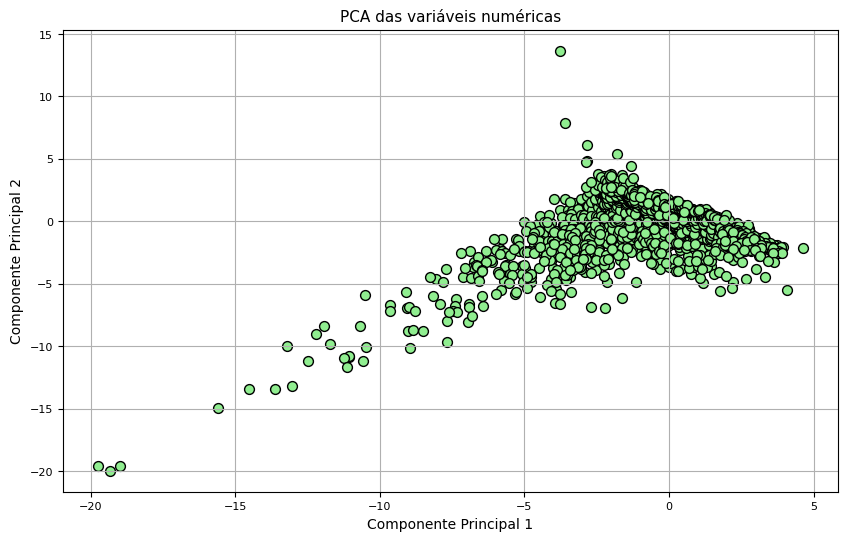

In [ ]:
# Cópia o dataset
df = tabuleiro_curado.copy()

# Selecionando um conjunto reduzido de variáveis numéricas para o PCA.
colunas_numerica = ["Idade Minima", "Max Jogadores", "Min Jogadores", "Tempo Jogo", "Media Complexidade",
                     "Media Classificacao", "Usuario Avaliado", "Classificacao BGG", "Usuario Proprietario"]

# Padroniza as variáveis para garantir que tenham média zero e desvio padrão igual a um.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[colunas_numerica])

# Aplica o PCA para reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Exibe a variância explicada por cada componente principal
print("Variância explicada:", pca.explained_variance_ratio_)

# Plota os dados transformados pelo PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgreen', edgecolor='k', s=50)
plt.xlabel("Componente Principal 1", fontsize=10)
plt.ylabel("Componente Principal 2", fontsize=10)
plt.title("PCA das variáveis numéricas", fontsize=11)

# Tamanho da fonte dos rótulos dos eixos X e Y.
plt.tick_params(axis='both', labelsize=8)

# Mostra o grid.
plt.grid(True)

# Mostra o gráfico.
plt.show()

📌**Comentário**: *O gráfico acima apresenta os resultados da Análise de Componentes Principais (PCA), aplicada com o objetivo de reduzir a dimensionalidade de um conjunto de variáveis numéricas associadas a jogos de tabuleiro. Essa redução permite projetar os dados em duas dimensões, facilitando a interpretação visual de padrões, tendências e agrupamentos.*
*A observação de agrupamentos visíveis sugere a existência de perfis semelhantes entre as caracteristicas númericas dos jogos.*
*A variância explicada pelos dois primeiros componentes principais é de 28,57 % e 19,68 %, respectivamente, totalizando 48,25 % da variabilidade presente no conjunto original de dados. Esse resultado indica que, embora a redução para duas dimensões preserve uma parcela significativa da informação, uma parte considerável da estrutura dos dados ainda está distribuída entre os demais componentes.*

#### 5.6. Transformação de uma variável categoria em numérica:
É o processo de converter informações qualitativas (categóricas) em valores numéricos, para que possam ser interpretadas por algoritmos de análise estatística ou machine learning, que geralmente só entendem números.

##### 5.6.1. **Label Encoding (Codificação Rótulos)**  
Atribui um número inteiro único a cada categoria. Útil para variáveis ordenadas.  
É mais compacto, pois mantém os dados em uma única coluna.  
Saída: Cada categoria recebe um número inteiro.

In [ ]:
# Usando Label Encoding (Codificação de Rótulos).

# Copiando o dataframe curado.
df_codificado = tabuleiro_curado[['Nome Jogo', 'Mecanica Jogo', 'Subgenero Jogo']].copy()

# Lista das colunas categóricas que você quer codificar
colunas_categoricas = ['Nome Jogo', 'Mecanica Jogo', 'Subgenero Jogo']

# Aplicando Label Encoding em cada coluna
le = LabelEncoder()
for col in colunas_categoricas:
    df_codificado[col] = df_codificado[col].astype(str)  # Garante que todos os valores sejam strings
    df_codificado[col] = le.fit_transform(df_codificado[col])

In [ ]:
# Exibindo os dados categoricos codificadados
print("Atributos categórico transformados:")
df_codificado

Atributos categórico transformados:


Nome Jogo  Mecanica Jogo  Subgenero Jogo
0           3513            592              33
1           5913            381              33
2           1317           3831              32
3           7786           2269              32
4           8726             60              33
...          ...            ...             ...
20335       5298           1769              20
20336       8021           4458              20
20337       8688           4452              10
20339       1097           1859              28
20340       1514           4452              10

[9644 rows x 3 columns]

##### 5.6.2. **One-Hot Encoding (Codificação Binária)**  
Cria colunas binárias para cada categoria. Ideal para variáveis não ordenadas.  
Saída: Cada categoria vira uma coluna com valores 0 ou 1.

In [ ]:
# Usando One-Hot Encoding

# Copiando o dataframe curado.
df_codificado = tabuleiro_curado[['Nome Jogo', 'Mecanica Jogo', 'Subgenero Jogo']].copy()

# One-Hot Encoding para os atributos X
df_codificado = OneHotEncoder(sparse_output=False).fit_transform(X) # 'sparse_output' é o novo parâmetro no Scikit-Learn 1.2+

In [ ]:
# Exibindo os dados categoricos codificadados
print("Atributos transformados:")
df_codificado

Atributos transformados:


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

📌**Comentário:** *Como as variaveis do dataset utilizado têm muitas categorias distintas, One-Hot Encoding gera um problema de alta dimensionalidade, pois são criadas várias colunas. Entretanto, o Label Encoding já é mais apropriado, pois gera um número inteiro para cada categoria, além de a ordem dos números não influenciar o aprendizado do modelo.*

##📋 6. Conclusão

A análise e o pré-processamento do dataset "Board-Games" (Jogos de Tabuleiro) reforçam a importância de compreender a estrutura dos dados antes de qualquer etapa de modelagem preditiva. O conjunto original apresentava inconsistências, valores ausentes e distribuições assimétricas em algumas variáveis, exigindo intervenções criteriosas de limpeza e transformação.  
A análise exploratória revelou padrões e relações significativas entre as variáveis, com o apoio de visualizações como gráficos de dispersão, gráficos de densidade, histogramas, boxplots e mapas de calor. Esses recursos facilitaram a interpretação de correlações, a identificação de outliers e a compreensão da distribuição dos dados, o que contribuiu para aumentar a robustez e a qualidade analítica do conjunto.  
Além disso, observou-se que transformações como normalização, padronização e codificação categórica (Label Encoding e One-Hot Encoding) são fundamentais tanto para a obtenção de visualizações mais eficazes quanto para as etapas posteriores de modelagem.  
As hipóteses formuladas ao longo da análise foram testadas com base nos dados disponíveis:

✅ 1) A idade mínima recomendada afeta a avaliação dos usuários?  
**R:** *Em geral, observou-se que jogos indicados para faixas etárias de até 16 anos apresentam avaliações mais elevadas. Por outro lado, para idades mais avançadas, os jogos tendem a receber avaliações inferiores. Esse comportamento pode estar relacionado a fatores como a maior exigência dos jogadores mais velhos, critérios de avaliação mais rigorosos ou até mesmo uma mudança no perfil dos jogos voltados para esse público.*

✅ 2) Jogos com maior número máximo de jogadores tendem a ter mais popularidade ou proprietários?  
**R:** *Verificou-se uma correlação positiva moderada entre o número máximo e o número mínimo de jogadores e o número de usuários, sugerindo que jogos que permitem um maior número de jogadores tendem a gerar menor interesse por parte dos usuários.*

✅ 3) Jogos com menor tempo médio de partida tendem a ser mais bem avaliados?  
**R:** *Observa-se um aumento no tempo dedicado aos jogos na faixa etária de 10 a 16 anos, sendo que aos 16 anos o tempo médio de jogo é consideravelmente superior em comparação às demais faixas. No entanto, a partir dos 18 anos, os jogadores tendem a dedicar menos tempo aos jogos.*

✅ 4) O subgenero do jogo influencia na sua nota média?  
**R:** *Os jogos de subgnero de Estratégia, Guerra, Infantis, Temáticos e Abstratos apresentam uma média de classificações superior à dos demais, evidenciando um elevado interesse por essas categorias. Em contrapartida, títulos que combinam múltiplos subgêneros tendem a atrair menor interesse, possivelmente em razão da dispersão de características e da dificuldade de oferecer uma experiência focada para um público-alvo específico. Essa análise sugere que a especialização em um único gênero pode proporcionar experiências mais envolventes e impactantes, refletidas em melhores avaliações.*

✅ 5) O tempo médio de jogo está relacionado à classificação no BoardGameGeek?  
**R:** *Foi identificada uma correlação fraca, o que indica que a duração do jogo, por si só, não exerce um impacto decisivo na classificação no BGG. Em contrapartida, fatores como a complexidade do jogo, a faixa etária recomendada e o número de jogadores demonstram uma influência mais significativa nas avaliações. Essa constatação ressalta a importância de adotar uma abordagem multifacetada na análise dos jogos, considerando não apenas o tempo de jogo, mas também aspectos qualitativos que determinam a experiência do usuário de forma mais abrangente.*

✅ 6) A complexidade do jogo afeta sua popularidade?  
**R:** *De forma geral, jogos com complexidade intermediária tendem a alcançar maior popularidade, enquanto jogos muito complexos ou muito simples mostram variações menores no número de proprietários.*

